<h1><center>AMCAT EDA</center></h1>

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Importing neccessary libraries](#0)<br>
2.  [Exploring Datasets with pandas](#1)<br>
3.  [Data Type Conversion](#2)<br>
4.  [Collapsing Categories](#3) <br>
5.  [Feature Engineering](#4) <br>
6.  [Univariate analysis](#5) <br> 
6.  [Outlier removal ](#6) <br>
7.  [Bivariate Analysis ](#7) <br>
8.   [Tri Variate Scatter Plots ](#8) <br>
    </div>


# Importing neccessary libraries<a id="0"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
np.random.seed(1111)

# Exploring Datasets with pandas<a id="1"></a>

In [2]:
amcat_data = pd.read_excel(r'E:\Downloads\minds.xlsx')
df = amcat_data.copy()
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


* Dropping the first two columns

In [3]:
df = df.drop(columns = ['Unnamed: 0', 'ID','CollegeID','CollegeCityID'])
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
df.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

* Converting all the column names to lower case

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.dtypes

salary                            int64
doj                      datetime64[ns]
dol                              object
designation                      object
jobcity                          object
gender                           object
dob                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
collegetier                       int64
degree                           object
specialization                   object
collegegpa                      float64
collegecitytier                   int64
collegestate                     object
graduationyear                    int64
english                           int64
logical                           int64
quant                             int64
domain                          float64
computerprogramming               int64
electronicsandsemicon             int64


# Data Type Conversion <a id="2"></a>

1. DOL - Date of Leaving. 
The survey was conducted back in 2015 and therefore making an assumption that the respondents who responded as **PRESENT** for DOL actually left the company within 2015 only. So, we will replace **PRESENT** value in DOL with 2015-12-31. Then we convert the datetype to datetime.

In [7]:
df['dol'].replace('present','2015-12-31', inplace = True)

In [8]:
df['dol'] = pd.to_datetime(df['dol'])

In [9]:
df.columns

Index(['salary', 'doj', 'dol', 'designation', 'jobcity', 'gender', 'dob',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'collegetier', 'degree', 'specialization', 'collegegpa',
       'collegecitytier', 'collegestate', 'graduationyear', 'english',
       'logical', 'quant', 'domain', 'computerprogramming',
       'electronicsandsemicon', 'computerscience', 'mechanicalengg',
       'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [10]:
categorical = ['designation','jobcity', 'gender','10board','12board','collegetier','degree',
              'specialization','collegecitytier','collegestate']
for cat in categorical:
    df[cat] = df[cat].astype('category')

In [11]:
df.dtypes

salary                            int64
doj                      datetime64[ns]
dol                      datetime64[ns]
designation                    category
jobcity                        category
gender                         category
dob                      datetime64[ns]
10percentage                    float64
10board                        category
12graduation                      int64
12percentage                    float64
12board                        category
collegetier                    category
degree                         category
specialization                 category
collegegpa                      float64
collegecitytier                category
collegestate                   category
graduationyear                    int64
english                           int64
logical                           int64
quant                             int64
domain                          float64
computerprogramming               int64
electronicsandsemicon             int64


* Summary Statistic for numerical columns

In [12]:
df.head()

,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,12graduation,12percentage,12board,collegetier,degree,specialization,collegegpa,collegecitytier,collegestate,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


* Checking if the Date of leaving is actually greater than Date of joining.

In [13]:
dates = df[(df['dol'] < df['doj'])].shape[0]
print(f'DOL is earlier than DOJ for {dates} observations.')
print(df.shape)

DOL is earlier than DOJ for 40 observations.
(3998, 35)


* These observations might be typos and hence we will drop those 40 rows.

In [14]:
df = df.drop(df[~(df['dol'] > df['doj'])].index)
print(df.shape)

(3943, 35)


* Making the entries for gender column more descriptive.

In [15]:
df['gender'].replace({'f':'Female','m':'Male'}, inplace = True)

In [16]:
df.head()

,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,12graduation,12percentage,12board,collegetier,degree,specialization,collegegpa,collegecitytier,collegestate,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,Male,1989-10-04,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,Female,1992-08-03,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,1989-12-05,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,Male,1991-02-27,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


* Validating if the results are in percentages and not in CGPA or otherwise.

In [17]:
print((df['10percentage'] <=10).sum())
print((df['12percentage'] <=10).sum())
print((df['collegegpa'] <=10).sum())

0
0
12


* 10percentage and 12percentage are fine but collegegpa has 12 obvservations which need to be deal with.

In [18]:
df.loc[df['collegegpa']<=10,'collegegpa'].index
#(df.loc[df['collegegpa']<=10,'collegegpa']/10)*100

Int64Index([7, 138, 788, 1419, 1439, 1767, 2151, 2229, 2293, 2662, 2691, 3308], dtype='int64')

In [19]:
df.loc[df['collegegpa']<=10,'collegegpa'] = (df.loc[df['collegegpa']<=10,'collegegpa']/10)*100

* Validating if there exist 0 or -1 in the data.

In [20]:
print((df==0).sum()[(df==0).sum() > 0])

10board             349
12board             358
collegecitytier    2761
graduationyear        1
dtype: int64


In [21]:
(df==-1).sum()[(df==-1).sum()>0]/len(df)*100

jobcity                  11.361907
domain                    6.137459
computerprogramming      21.836165
electronicsandsemicon    71.392341
computerscience          77.605884
mechanicalengg           94.040071
electricalengg           96.094344
telecomengg              90.565559
civilengg                98.934821
dtype: float64

* According to the description of the columns:
1. 10board
2. 12board
3. graduationyear
4. jobcity
5. domain

**The above columns cannot have zeros or -1 as their inputs and hence they should be considered as null values and therefore imputed**

* The following columns describes subjects which are optional for the exam and that is why they have large number of -1(null values). Hence we will be dropping the columns out of analysis in which the percentage for -1 values is greater than or equal to 80% and for the rest of them, we will impute the values as zero.
1. electronicsandsemicon          
2. computerscience          
3. mechanicalengg           
4. electricalengg           
5. telecomengg   
6. civilengg                

In [22]:
df = df.drop(columns = ['mechanicalengg','electricalengg','telecomengg','civilengg'])

In [23]:
df['10board'] = df['10board'].replace({0:np.nan})
df['12board'] = df['12board'].replace({0:np.nan})
df['graduationyear'] = df['graduationyear'].replace({0:np.nan})
df['jobcity'] = df['jobcity'].replace({-1:np.nan})
df['domain'] = df['domain'].replace({-1:np.nan})
df['electronicsandsemicon'] = df['electronicsandsemicon'].replace({-1:0})
df['computerscience'] = df['computerscience'].replace({-1:0})
df['computerprogramming'] = df['computerprogramming'].replace({-1:np.nan})

* Imputing categorical columns with mode values for their respective columns.

In [24]:
df['10board'].fillna(df['10board'].mode()[0], inplace = True)
df['12board'].fillna(df['12board'].mode()[0], inplace = True)
df['graduationyear'].fillna(df['graduationyear'].mode()[0], inplace = True)
df['jobcity'].fillna(df['jobcity'].mode()[0], inplace = True)

* Imputing the numerical columns with median values for their respective columns.

In [25]:
df['domain'].fillna(df['domain'].median(), inplace = True)
df['computerprogramming'].fillna(df['computerprogramming'].median(), inplace = True)

In [26]:
df.head()

,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,12graduation,12percentage,12board,collegetier,degree,specialization,collegegpa,collegecitytier,collegestate,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011.0,515,585,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,Male,1989-10-04,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012.0,695,610,780,0.960603,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,Female,1992-08-03,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014.0,615,545,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,1989-12-05,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011.0,635,585,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,Male,1991-02-27,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012.0,545,625,465,0.124502,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [27]:
def correct_string_data(data):
    '''
    Convert the textual categories to lower case
    and remove the leading or trailing spaces if any.
    
    '''
    df[data] = df[data].str.lower().str.strip()

In [28]:
textual_columns = ['designation','jobcity','10board',
                  '12board','specialization','collegestate']

In [29]:
for col in textual_columns:
    print(f'Number of unique values in {col} with inconsistency : {df[col].nunique()}')

Number of unique values in designation with inconsistency : 416
Number of unique values in jobcity with inconsistency : 337
Number of unique values in 10board with inconsistency : 274
Number of unique values in 12board with inconsistency : 339
Number of unique values in specialization with inconsistency : 46
Number of unique values in collegestate with inconsistency : 26


In [30]:
for col in textual_columns:
    correct_string_data(col)

In [31]:
for col in textual_columns:
    print(f'Number of unique values in {col} without inconsistency : {df[col].nunique()}')

Number of unique values in designation without inconsistency : 416
Number of unique values in jobcity without inconsistency : 230
Number of unique values in 10board without inconsistency : 272
Number of unique values in 12board without inconsistency : 336
Number of unique values in specialization without inconsistency : 46
Number of unique values in collegestate without inconsistency : 26


* Since the number of categories are large enough to deal with, we keep the top 10 categories.

# Collapsing Categories <a id="3"></a>

* Keeping only the top 10 frequent categories and classifying others as **other**.

In [32]:
def collapsing_categories(df, data):
    for designation in df[data].unique():
        min_count = df[data].value_counts()[:10].min()
        if df[df[data] == designation][data].value_counts()[0] < min_count:
            df.loc[df[data] == designation, data] = 'other'

In [33]:
for cols in textual_columns:
    collapsing_categories(df, cols)

In [34]:
for cols in textual_columns:
    print(df[cols].value_counts())
    print('*'*100)

other                         2259
software engineer              535
software developer             262
system engineer                202
programmer analyst             139
systems engineer               117
java software engineer         109
software test engineer         100
project engineer                76
technical support engineer      73
senior software engineer        71
Name: designation, dtype: int64
****************************************************************************************************
bangalore    1109
other         807
noida         382
hyderabad     361
pune          322
chennai       310
gurgaon       212
new delhi     203
mumbai        119
kolkata       118
Name: jobcity, dtype: int64
****************************************************************************************************
cbse                            1726
state board                     1140
other                            498
icse                             276
ssc                      

* Mapping consistent categories in **designation** and **specialization** column.

In [35]:
desig_mapping  = {'systems engineer':'system engineer'}
spec_mapping = {'electronics and communication engineering':'electronics & telecommunications',
               'electrical engineering':'electronics and electrical engineering',
               'computer engineering':'computer science & engineering'}

In [36]:
df['designation'].replace(desig_mapping, inplace = True)
df['specialization'].replace(spec_mapping, inplace = True)

In [37]:
df.head()

,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,12graduation,12percentage,12board,collegetier,degree,specialization,collegegpa,collegecitytier,collegestate,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,other,bangalore,Female,1990-02-19,84.3,other,2007,95.8,other,2,B.Tech/B.E.,computer science & engineering,78.00,0,andhra pradesh,2011.0,515,585,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,other,other,Male,1989-10-04,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics & telecommunications,70.06,0,madhya pradesh,2012.0,695,610,780,0.960603,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,system engineer,chennai,Female,1992-08-03,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,uttar pradesh,2014.0,615,545,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,gurgaon,Male,1989-12-05,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer science & engineering,74.64,1,other,2011.0,635,585,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,other,other,Male,1991-02-27,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics & telecommunications,73.90,0,uttar pradesh,2012.0,545,625,465,0.124502,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


# Feature Engineering <a id="4"></a>

* Since the dataset was release in 2015, we add a age column by subtracting DOB year from 2015. This will add the age as of 2015.

In [38]:
df['Age(2015)'] = 2015 - df['dob'].dt.year

* Adding a tenure column by subtracting the DOL from DOJ

In [39]:
#creating a column of tenure by subtracting DOL from DOJ
delta = (df['dol'] - df['doj'])
tenure = np.zeros(len(df))
for i, date in enumerate(delta):
    tenure[i] = round(date.days/365,2)
df['tenure'] = tenure

In [40]:
#checking if all the tenure observations are greate than 0.
#

* Assuming that if the graduationyear is greater than or equal to date of joining. By subtracting year of joining from graduationyear we can find out if there is any year gap.

In [41]:
#checking for how many values graduationyear is greater than year of joining and dropping them.
len(df[(df['graduationyear'] > df['doj'].dt.year)].index)

79

In [42]:
#dropping those 79 rows as it will give a negative year gap
df = df.drop(df[(df['graduationyear'] > df['doj'].dt.year)].index)

* Adding a gap year column.

In [43]:
df['yeargap'] = (df['doj'].dt.year - df['graduationyear'])

In [44]:
df.head()

,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,12graduation,12percentage,12board,collegetier,degree,specialization,collegegpa,collegecitytier,collegestate,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age(2015),tenure,yeargap
0,420000,2012-06-01,2015-12-31,other,bangalore,Female,1990-02-19,84.3,other,2007,95.8,other,2,B.Tech/B.E.,computer science & engineering,78.00,0,andhra pradesh,2011.0,515,585,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,25,3.58,1.0
1,500000,2013-09-01,2015-12-31,other,other,Male,1989-10-04,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics & telecommunications,70.06,0,madhya pradesh,2012.0,695,610,780,0.960603,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,26,2.33,1.0
2,325000,2014-06-01,2015-12-31,system engineer,chennai,Female,1992-08-03,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,uttar pradesh,2014.0,615,545,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,23,1.58,0.0
3,1100000,2011-07-01,2015-12-31,senior software engineer,gurgaon,Male,1989-12-05,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer science & engineering,74.64,1,other,2011.0,635,585,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,26,4.50,0.0
4,200000,2014-03-01,2015-03-01,other,other,Male,1991-02-27,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics & telecommunications,73.90,0,uttar pradesh,2012.0,545,625,465,0.124502,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,24,1.00,2.0


In [45]:
#function to calculate x and y to plot CDF.
def cdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1)/len(x)
    return x, y

In [46]:
colors = ['#CD6155','#5499C7','#AF7AC5','#48C9B0','#52BE80','#F4D03F',
         '#FA8072','#800020','#808000','#7393B3']

# Univariate analysis <a id="5"></a>

## Continuous features

### 1. Tenure

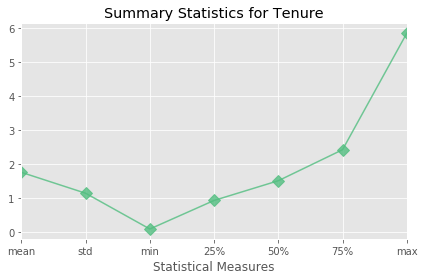

In [47]:
df['tenure'].describe()[1:].plot(color = colors[4], alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Tenure')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

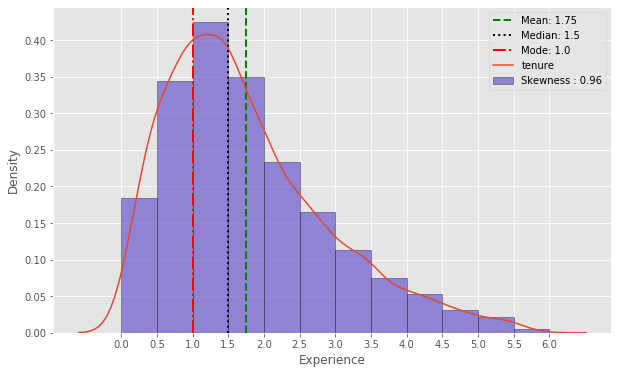

In [48]:
plt.figure(figsize = (10,6))
plt.hist(df['tenure'],
        ec = 'k',
        bins = np.arange(0, df['tenure'].max()+0.5, 0.5),
        color = 'slateblue',
        alpha = 0.7,
        label = f"Skewness : {round(df['tenure'].skew(),2)}",
        density = True)
plt.xticks(ticks = np.arange(0, df['tenure'].max()+0.5, 0.5))
plt.xlabel('Experience')
plt.ylabel('Density')
plt.axvline(df['tenure'].mean(), label = f"Mean: {round(df['tenure'].mean(),2)}", 
            linestyle = '--',
           color = 'green', linewidth = 2)
plt.axvline(df['tenure'].median(), label = f"Median: {round(df['tenure'].median(),2)}",
            linestyle = ':',
           color = 'k', linewidth = 2)
plt.axvline(df['tenure'].mode()[0], label = f"Mode: {round(df['tenure'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
sns.kdeplot(df['tenure'])
plt.legend()
plt.show()

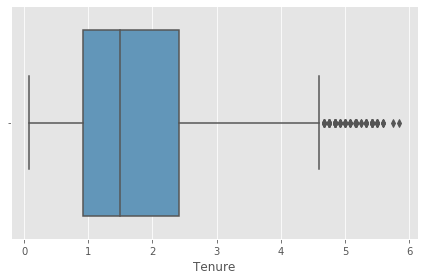

In [49]:
sns.boxplot(df['tenure'], color = colors[1])
plt.xlabel('Tenure')
plt.tight_layout()
plt.show()

In [50]:
x_tenure, y_tenure = cdf(df['tenure'])
x_sample_tenure, y_sample_tenure = cdf(np.random.normal(df['tenure'].mean(), df['tenure'].std(), size = len(df['tenure'])))

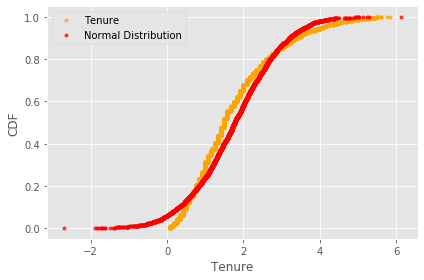

In [51]:
plt.plot(x_tenure, y_tenure, linestyle = 'None', 
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Tenure')
plt.plot(x_sample_tenure, y_sample_tenure, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Tenure')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

* **Conclusions**:
1. Summary Plot : The range for experience is 4 years.
2. Histogram   : The data is positively skewed i.e there exists larger number of respondents with
   low tenure. 50% data points are below 1.5 years. Average tenure is 1.5 years. The mean, median and mode lie very close to each other and skewness(0.6) is close to that of a normal(0).
3. Box Plot    : There are few values with large tenure i.e outliers
4. CDF    : The data is not normally distributed. We can say that tenure is not normally distributed. 

### 2. Salary

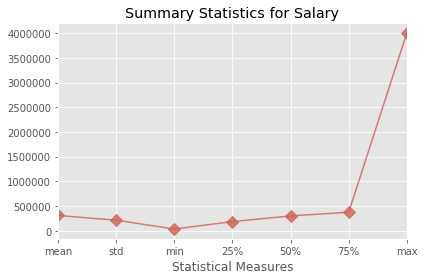

In [52]:
df['salary'].describe()[1:].plot(color = colors[0], alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Salary')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

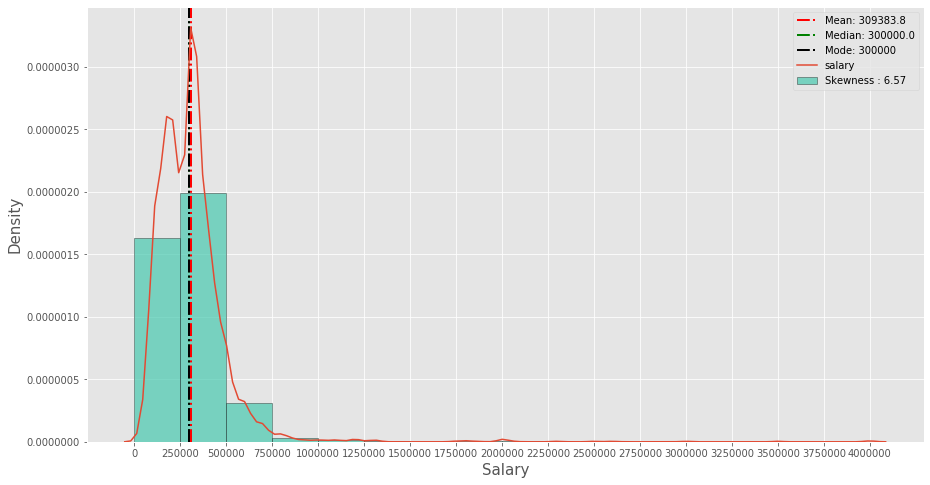

In [53]:
bins = np.arange(0, df['salary'].max()+250000, 250000)
plt.figure(figsize = (15,8))
plt.hist(df['salary'], ec = 'k',
        color = colors[3], bins = bins,
        label = f"Skewness : {round(df['salary'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Salary', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df['salary'].mean(), label = f"Mean: {round(df['salary'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(df['salary'].median(), label = f"Median: {round(df['salary'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(df['salary'].mode()[0], label = f"Mode: {round(df['salary'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(df['salary'])
plt.legend()
plt.show()

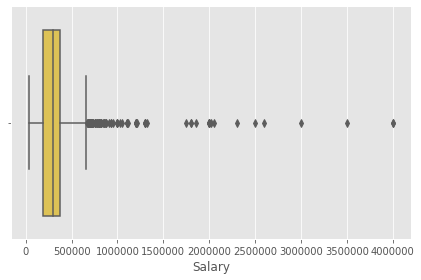

In [54]:
sns.boxplot(df['salary'], color = colors[5])
plt.xlabel('Salary')
plt.tight_layout()
plt.show()

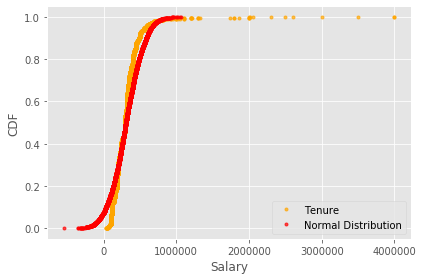

In [55]:
x_salary, y_salary = cdf(df['salary'])
x_sample_salary, y_sample_salary = \
cdf(np.random.normal(df['salary'].mean(), df['salary'].std(), size = len(df['salary'])))
plt.plot(x_salary, y_salary, linestyle = 'None', 
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Tenure')
plt.plot(x_sample_salary, y_sample_salary, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Salary')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

* **Conclusions**:
1. Summary Plot : There is high variation in salary..
2. Histogram   : The data is positively and highly skewed with skewness 6(approx) which is large as compared to that of normal(0). Mean, median and mode all are approximately equal.
3. Box Plot    : There are large number of data points with high salaries.
4. CDF    : The data is highly skewed and deviates largely from normal distribution. 

### 3. 10percentage

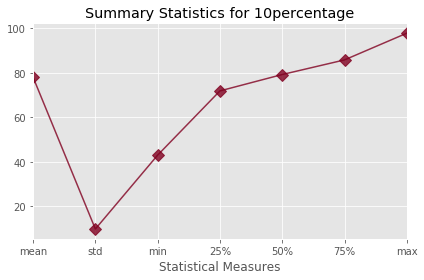

In [56]:
df['10percentage'].describe()[1:].plot(color = colors[7], alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for 10percentage')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

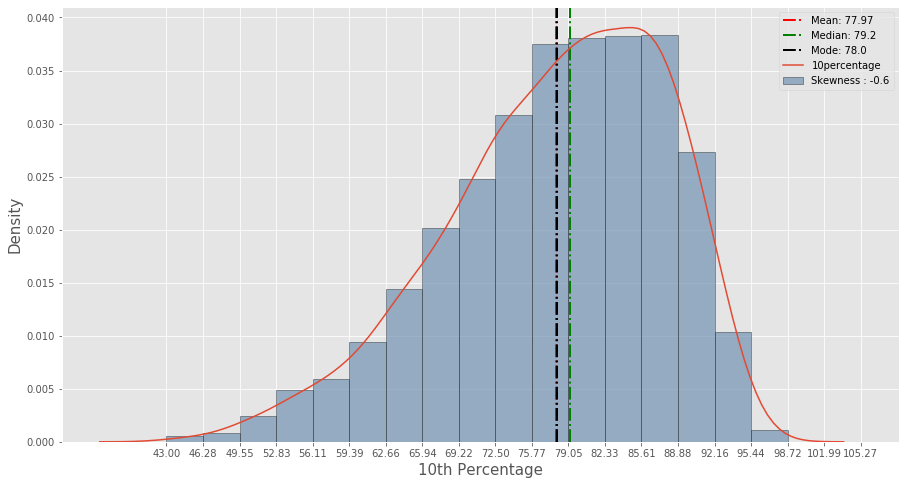

In [57]:
bins = np.arange(df['10percentage'].min(), df['10percentage'].max()+df['10percentage'].std(), 
                 df['10percentage'].std()/3)
plt.figure(figsize = (15,8))
plt.hist(df['10percentage'], ec = 'k',
        color = colors[9], bins = bins,
        label = f"Skewness : {round(df['10percentage'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('10th Percentage', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df['10percentage'].mean(), label = f"Mean: {round(df['10percentage'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(df['10percentage'].median(), label = f"Median: {round(df['10percentage'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(df['10percentage'].mode()[0], label = f"Mode: {round(df['10percentage'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(df['10percentage'])
plt.legend()
plt.show()

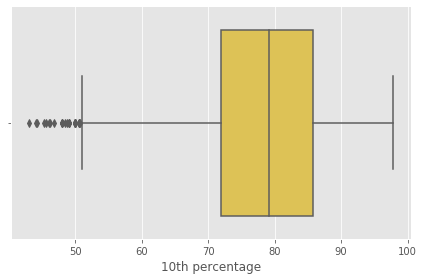

In [58]:
sns.boxplot(df['10percentage'], color = colors[5])
plt.xlabel('10th percentage')
plt.tight_layout()
plt.show()

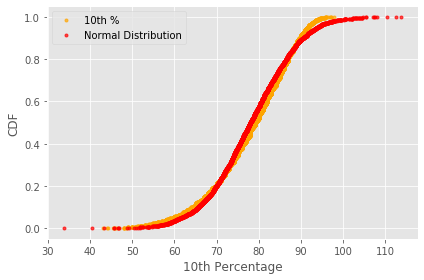

In [59]:
x_10, y_10 = cdf(df['10percentage'])
x_sample_10 , y_sample_10 = \
cdf(np.random.normal(df['10percentage'].mean(), df['10percentage'].std(), size = len(df['10percentage'])))
plt.plot(x_10, y_10, linestyle = 'None', 
        marker = '.', color = 'orange',
         alpha = 0.7, label = '10th %')
plt.plot(x_sample_10, y_sample_10, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('10th Percentage')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

* **Conclusions**:
1. Summary Plot : 50% of students scored less than approximately 80%.
2. Histogram   : There are very less students with low % and the majority of the students scored b/w 75% - 90%. Maximum number of students scored 78% and on average the score was 77%.
3. Box Plot    : The box plot shows that there are few very outliers.
4. CDF    : The data is bit skewed and not normally distributed.

### 4. 12percentage

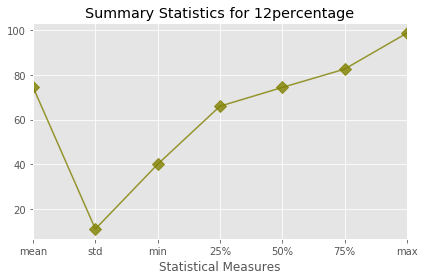

In [60]:
df['12percentage'].describe()[1:].plot(color = colors[8], alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for 12percentage')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

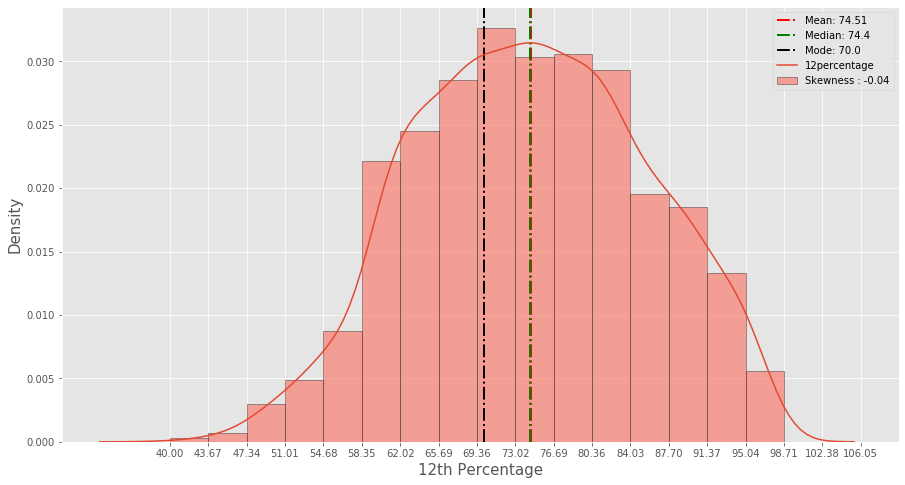

In [61]:
bins = np.arange(df['12percentage'].min(), df['12percentage'].max()+df['12percentage'].std(), 
                 df['12percentage'].std()/3)
plt.figure(figsize = (15,8))
plt.hist(df['12percentage'], ec = 'k',
        color = colors[6], bins = bins,
        label = f"Skewness : {round(df['12percentage'].skew(),2)}",
        alpha = 0.7, 
        density = True)
plt.xticks(bins)
plt.xlabel('12th Percentage', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df['12percentage'].mean(), label = f"Mean: {round(df['12percentage'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(df['12percentage'].median(), label = f"Median: {round(df['12percentage'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(df['12percentage'].mode()[0], label = f"Mode: {round(df['12percentage'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(df['12percentage'])
plt.legend()
plt.show()

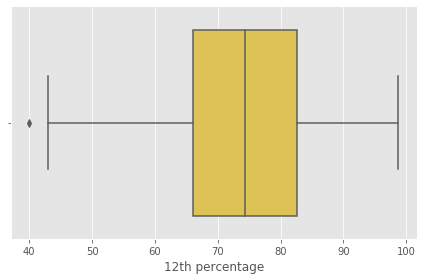

In [62]:
sns.boxplot(df['12percentage'], color = colors[5])
plt.xlabel('12th percentage')
plt.tight_layout()
plt.show()

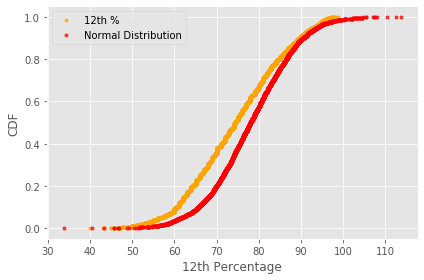

In [63]:
x_12, y_12 = cdf(df['12percentage'])
x_sample_12 , y_sample_12 = \
cdf(np.random.normal(df['12percentage'].mean(), df['12percentage'].std(), size = len(df['12percentage'])))
plt.plot(x_12, y_12, linestyle = 'None', 
        marker = '.', color = 'orange',
         alpha = 0.7, label = '12th %')
plt.plot(x_sample_10, y_sample_10, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('12th Percentage')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

* **Conclusions**:
1. Summary Plot : 50% of students scored less than approximately 78%.
2. Histogram   : There are very less students with low % and the majority of the students scored b/w 69% - 84%. Maximum number of students scored 70% and on average the score was 74%.
3. Box Plot    : The box plot shows that there is only data point with extreamly low score.
4. CDF    : The data is not normally distributed.

In [64]:
df.head()

,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,12graduation,12percentage,12board,collegetier,degree,specialization,collegegpa,collegecitytier,collegestate,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age(2015),tenure,yeargap
0,420000,2012-06-01,2015-12-31,other,bangalore,Female,1990-02-19,84.3,other,2007,95.8,other,2,B.Tech/B.E.,computer science & engineering,78.00,0,andhra pradesh,2011.0,515,585,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,25,3.58,1.0
1,500000,2013-09-01,2015-12-31,other,other,Male,1989-10-04,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics & telecommunications,70.06,0,madhya pradesh,2012.0,695,610,780,0.960603,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,26,2.33,1.0
2,325000,2014-06-01,2015-12-31,system engineer,chennai,Female,1992-08-03,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,uttar pradesh,2014.0,615,545,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,23,1.58,0.0
3,1100000,2011-07-01,2015-12-31,senior software engineer,gurgaon,Male,1989-12-05,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer science & engineering,74.64,1,other,2011.0,635,585,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,26,4.50,0.0
4,200000,2014-03-01,2015-03-01,other,other,Male,1991-02-27,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics & telecommunications,73.90,0,uttar pradesh,2012.0,545,625,465,0.124502,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,24,1.00,2.0


### 5. College GPA

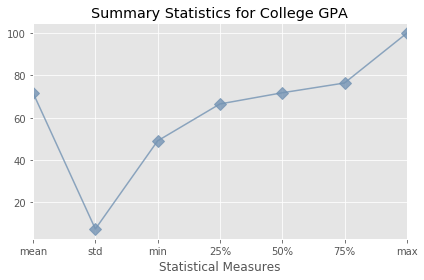

In [65]:
df['collegegpa'].describe()[1:].plot(color = colors[9], alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for College GPA')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

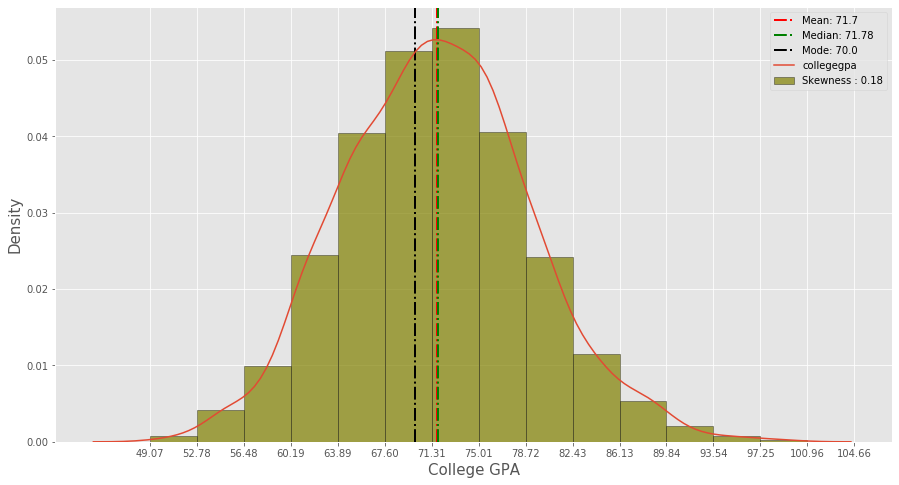

In [66]:
bins = np.arange(df['collegegpa'].min(), df['collegegpa'].max()+df['collegegpa'].std(), 
                 df['collegegpa'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(df['collegegpa'], ec = 'k',
        color = colors[8], bins = bins,
        label = f"Skewness : {round(df['collegegpa'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('College GPA', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df['collegegpa'].mean(), label = f"Mean: {round(df['collegegpa'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(df['collegegpa'].median(), label = f"Median: {round(df['collegegpa'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(df['collegegpa'].mode()[0], label = f"Mode: {round(df['collegegpa'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(df['collegegpa'])
plt.legend()
plt.show()

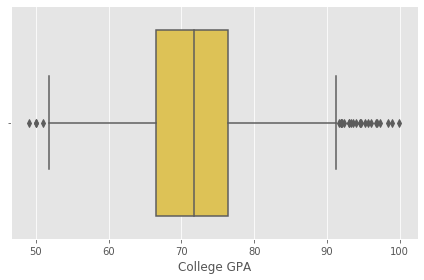

In [67]:
sns.boxplot(df['collegegpa'], color = colors[5])
plt.xlabel('College GPA')
plt.tight_layout()
plt.show()

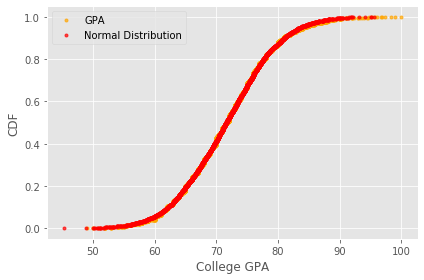

In [68]:
x_gpa, y_gpa = cdf(df['collegegpa'])
x_sample_gpa , y_sample_gpa = \
cdf(np.random.normal(df['collegegpa'].mean(), df['collegegpa'].std(), size = len(df['12percentage'])))
plt.plot(x_gpa, y_gpa, linestyle = 'None', 
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'GPA')
plt.plot(x_sample_gpa, y_sample_gpa, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('College GPA')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

* **Conclusions**:
1. Summary Plot : 75% of students GPA was less than approximately 80%.
2. Histogram   : Majority of the students GPA were in b/w 63% - 78%. Maximum number of students scored 70% and on average GPA score was 74%.
3. Box Plot    : The box plot shows that there exist low extreme values as well as high extreme values.
4. CDF    : The data is suffciently normally distributed.

### 6. English

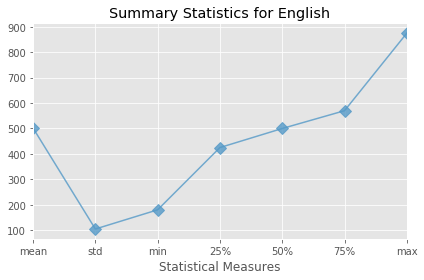

In [69]:
df['english'].describe()[1:].plot(color = colors[1], alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for English')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

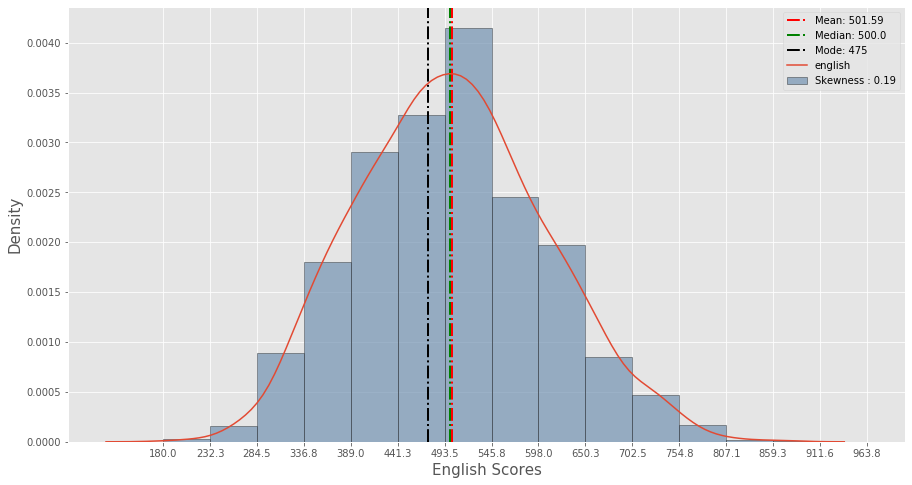

In [70]:
bins = np.arange(df['english'].min(), df['english'].max()+df['english'].std(), 
                 df['english'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(df['english'], ec = 'k',
        color = colors[9], bins = bins,
        label = f"Skewness : {round(df['english'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('English Scores', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df['english'].mean(), label = f"Mean: {round(df['english'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(df['english'].median(), label = f"Median: {round(df['english'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(df['english'].mode()[0], label = f"Mode: {round(df['english'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(df['english'])
plt.legend()
plt.show()

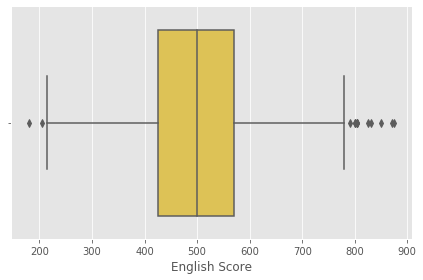

In [71]:
sns.boxplot(df['english'], color = colors[5])
plt.xlabel('English Score')
plt.tight_layout()
plt.show()

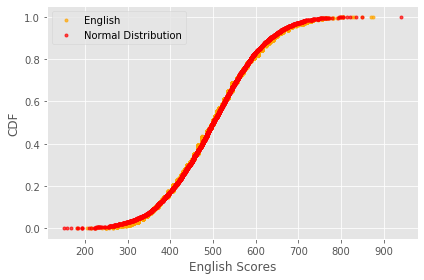

In [72]:
x_eng, y_eng = cdf(df['english'])
x_sample_eng , y_sample_eng = \
cdf(np.random.normal(df['english'].mean(), df['english'].std(), size = len(df['english'])))
plt.plot(x_eng, y_eng, linestyle = 'None', 
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'English ')
plt.plot(x_sample_eng, y_sample_eng, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('English Scores')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

* **Conclusions**:
1. Summary Plot : 50% of student's english score was less than 500.
2. Histogram   : Majority of the score were in b/w 389 - 545. Maximum number of students scored 475 and on average score was 502.
3. Box Plot    : The box plot shows that there exist low extreme values as well as high extreme values.
4. CDF    : The data is sufficiently normally distributed.

### 7. Logical

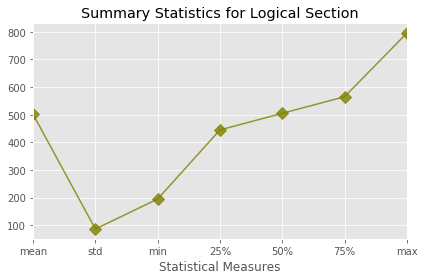

In [73]:
df['logical'].describe()[1:].plot(color = colors[8], alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Logical Section')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

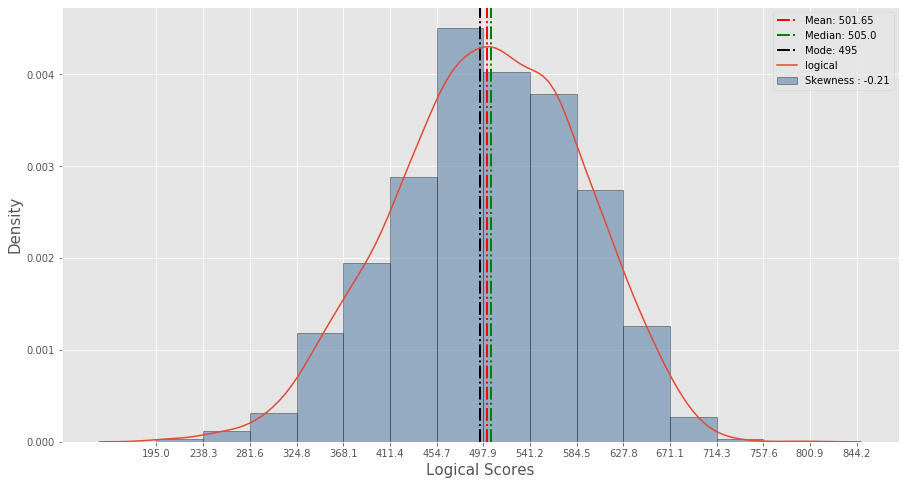

In [74]:
bins = np.arange(df['logical'].min(), df['logical'].max()+df['logical'].std(), 
                 df['logical'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(df['logical'], ec = 'k',
        color = colors[9], bins = bins,
        label = f"Skewness : {round(df['logical'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Logical Scores', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df['logical'].mean(), label = f"Mean: {round(df['logical'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(df['logical'].median(), label = f"Median: {round(df['logical'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(df['logical'].mode()[0], label = f"Mode: {round(df['logical'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(df['logical'])
plt.legend()
plt.show()

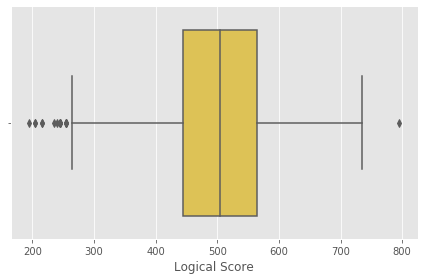

In [75]:
sns.boxplot(df['logical'], color = colors[5])
plt.xlabel('Logical Score')
plt.tight_layout()
plt.show()

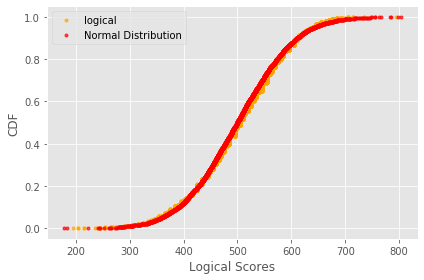

In [76]:
x_log, y_log = cdf(df['logical'])
x_sample_log , y_sample_log = \
cdf(np.random.normal(df['logical'].mean(), df['logical'].std(), size = len(df['logical'])))
plt.plot(x_log, y_log, linestyle = 'None', 
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'logical ')
plt.plot(x_sample_log, y_sample_log, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Logical Scores')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

* **Conclusions**:
1. Summary Plot : 50% of student's logical score was less than 500.
2. Histogram   : Majority of the score were in b/w 454 - 584. Maximum number of students scored 495 and on average score was 502.
3. Box Plot    : The box plot shows that there exist low extreme values but only one high extreme values.
4. CDF    : The data is sufficiently close to normally distributed.

### 8. Quant

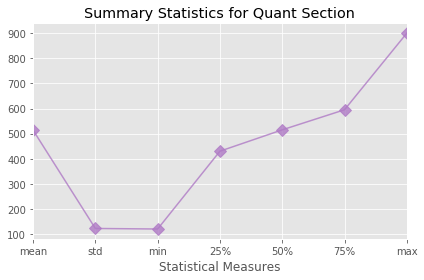

In [77]:
df['quant'].describe()[1:].plot(color = colors[2], alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Quant Section')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

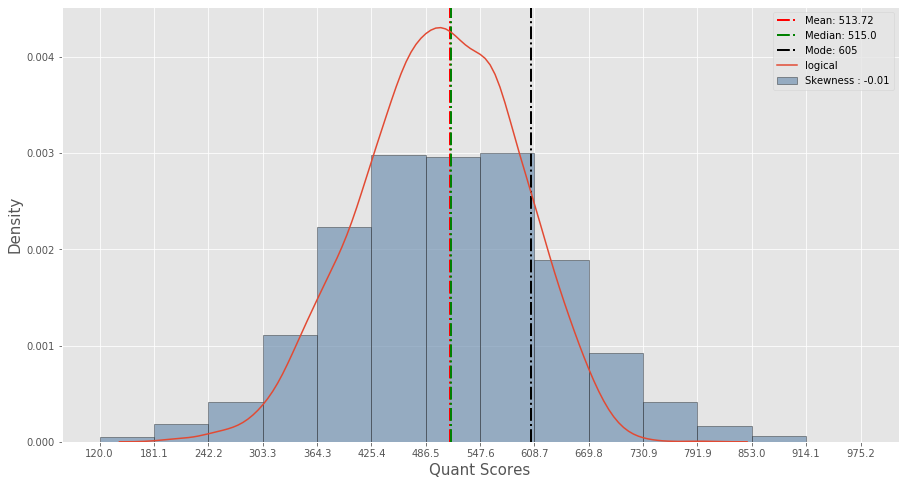

In [78]:
bins = np.arange(df['quant'].min(), df['quant'].max()+df['quant'].std(), 
                 df['quant'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(df['quant'], ec = 'k',
        color = colors[9], bins = bins,
        label = f"Skewness : {round(df['quant'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Quant Scores', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df['quant'].mean(), label = f"Mean: {round(df['quant'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(df['quant'].median(), label = f"Median: {round(df['quant'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(df['quant'].mode()[0], label = f"Mode: {round(df['quant'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(df['logical'])
plt.legend()
plt.show()

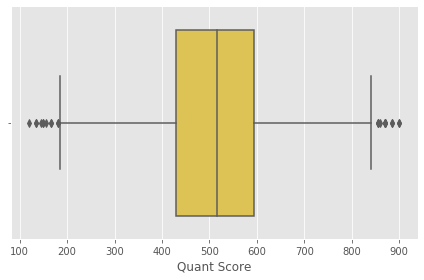

In [79]:
sns.boxplot(df['quant'], color = colors[5])
plt.xlabel('Quant Score')
plt.tight_layout()
plt.show()

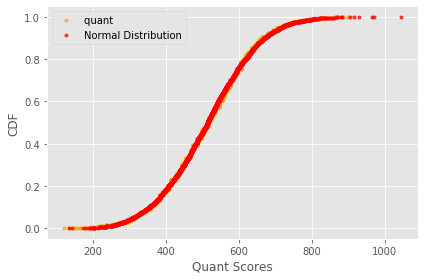

In [80]:
x_q, y_q = cdf(df['quant'])
x_sample_q , y_sample_q = \
cdf(np.random.normal(df['quant'].mean(), df['quant'].std(), size = len(df['quant'])))
plt.plot(x_q, y_q, linestyle = 'None', 
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'quant ')
plt.plot(x_sample_q, y_sample_q, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Quant Scores')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

* **Conclusions**:
1. Summary Plot : 75% of student's logical score was less than 600.
2. Histogram   : Majority of the score were in b/w 425 - 608. Maximum number of students scored 605 and on average score was 513.
3. Box Plot    : The box plot shows that there exist low extreme values as well as high extreme values.
4. CDF    : The data is sufficiently close to normally distributed.

### 9. Computer Programming

In [81]:
df.columns

Index(['salary', 'doj', 'dol', 'designation', 'jobcity', 'gender', 'dob',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'collegetier', 'degree', 'specialization', 'collegegpa',
       'collegecitytier', 'collegestate', 'graduationyear', 'english',
       'logical', 'quant', 'domain', 'computerprogramming',
       'electronicsandsemicon', 'computerscience', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Age(2015)', 'tenure', 'yeargap'],
      dtype='object')

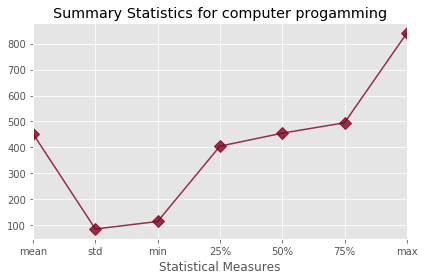

In [82]:
df['computerprogramming'].describe()[1:].plot(color = colors[7], alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for computer progamming')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

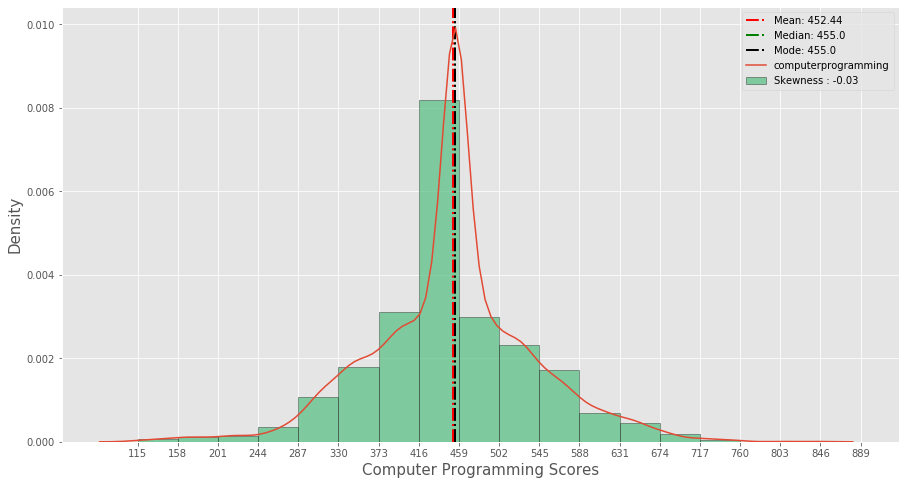

In [83]:
bins = np.arange(df['computerprogramming'].min(), df['computerprogramming'].max()+df['computerprogramming'].std(), 
                 df['computerprogramming'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(df['computerprogramming'], ec = 'k',
        color = colors[4], bins = bins,
        label = f"Skewness : {round(df['computerprogramming'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Computer Programming Scores', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df['computerprogramming'].mean(), label = f"Mean: {round(df['computerprogramming'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(df['computerprogramming'].median(), label = f"Median: {round(df['computerprogramming'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(df['computerprogramming'].mode()[0], label = f"Mode: {round(df['computerprogramming'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(df['computerprogramming'])
plt.legend()
plt.show()

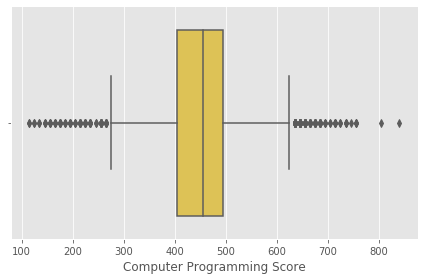

In [84]:
sns.boxplot(df['computerprogramming'], color = colors[5])
plt.xlabel('Computer Programming Score')
plt.tight_layout()
plt.show()

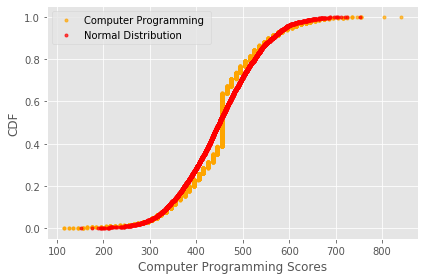

In [85]:
x_cp, y_cp = cdf(df['computerprogramming'])
x_sample_cp , y_sample_cp = \
cdf(np.random.normal(df['computerprogramming'].mean(), df['computerprogramming'].std(), size = \
                     len(df['computerprogramming'])))
plt.plot(x_cp, y_cp, linestyle = 'None', 
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Computer Programming ')
plt.plot(x_sample_cp, y_sample_cp, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Computer Programming Scores')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

* **Conclusions**:
1. Summary Plot : 50% of student's score was less than 500.
2. Histogram   : Majority of the score were in b/w 416 - 459. Maximum number of students scored 455 and on average score was 452.
3. Box Plot    : The box plot shows that there exist large number low extreme values as well as high extreme values.
4. CDF    : The data is not normally distributed.

### 10. Electronics & Seminconductors

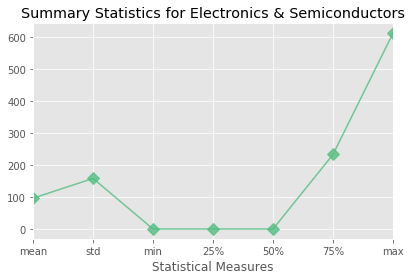

In [86]:
df['electronicsandsemicon'].describe()[1:].plot(color = colors[4], alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Electronics & Semiconductors')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

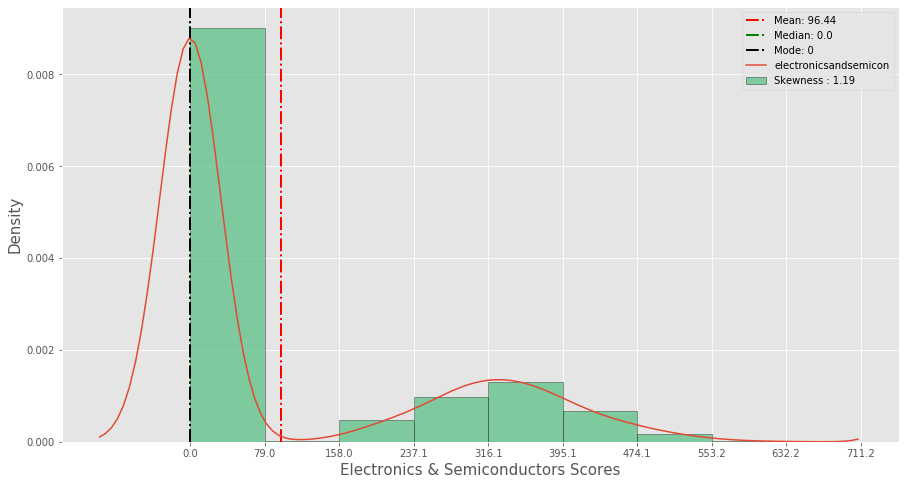

In [87]:
bins = np.arange(df['electronicsandsemicon'].min(), df['electronicsandsemicon'].max()+df['electronicsandsemicon'].std(), 
                 df['electronicsandsemicon'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(df['electronicsandsemicon'], ec = 'k',
        color = colors[4], bins = bins,
        label = f"Skewness : {round(df['electronicsandsemicon'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Electronics & Semiconductors Scores', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df['electronicsandsemicon'].mean(), label = f"Mean: {round(df['electronicsandsemicon'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(df['electronicsandsemicon'].median(), label = f"Median: {round(df['electronicsandsemicon'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(df['electronicsandsemicon'].mode()[0], label = f"Mode: {round(df['electronicsandsemicon'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(df['electronicsandsemicon'])
plt.legend()
plt.show()

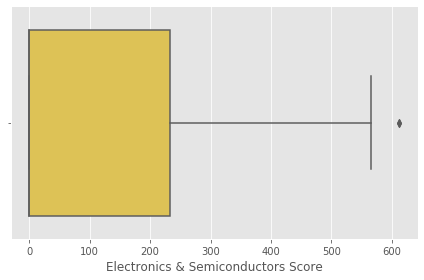

In [88]:
sns.boxplot(df['electronicsandsemicon'], color = colors[5])
plt.xlabel('Electronics & Semiconductors Score')
plt.tight_layout()
plt.show()

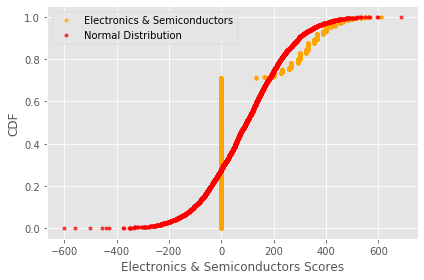

In [89]:
x_cp, y_cp = cdf(df['electronicsandsemicon'])
x_sample_cp , y_sample_cp = \
cdf(np.random.normal(df['electronicsandsemicon'].mean(), df['electronicsandsemicon'].std(), size = \
                     len(df['electronicsandsemicon'])))
plt.plot(x_cp, y_cp, linestyle = 'None', 
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Electronics & Semiconductors')
plt.plot(x_sample_cp, y_sample_cp, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Electronics & Semiconductors Scores')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

* **Conclusions**:
1. Summary Plot : 75% of student's score was less than 250(approx).
2. Histogram   : Majority of the score were in b/w 0 - 79. Maximum number of students scored 0 and on average score was 96.
3. Box Plot    : Minimum score is equal to the median of the data.
4. CDF    : The data is not normally distributed.

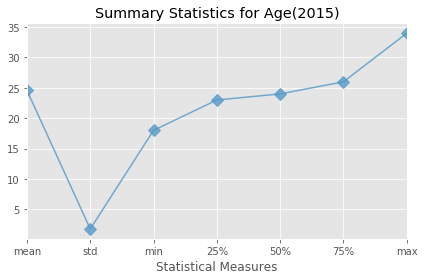

In [90]:
df['Age(2015)'].describe()[1:].plot(color = colors[1], alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Age(2015)')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

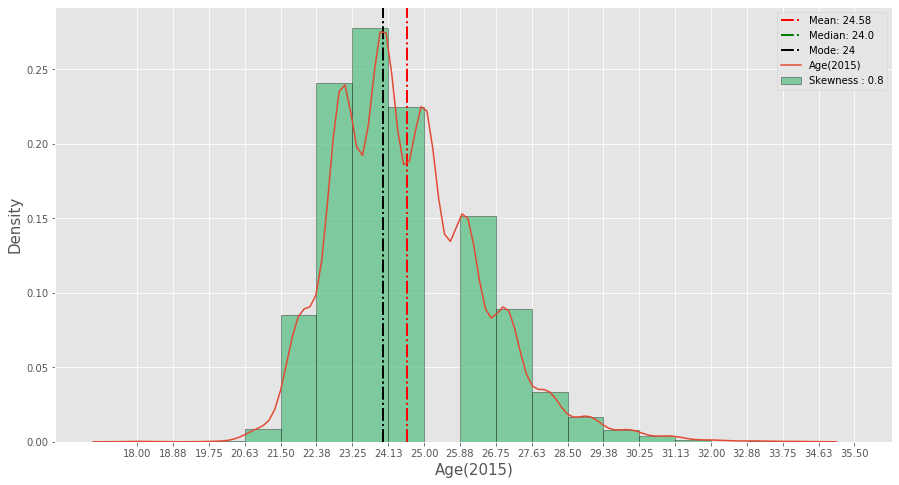

In [91]:
bins = np.arange(df['Age(2015)'].min(), df['Age(2015)'].max()+df['Age(2015)'].std(), 
                 df['Age(2015)'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(df['Age(2015)'], ec = 'k',
        color = colors[4], bins = bins,
        label = f"Skewness : {round(df['Age(2015)'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Age(2015)', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df['Age(2015)'].mean(), label = f"Mean: {round(df['Age(2015)'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(df['Age(2015)'].median(), label = f"Median: {round(df['Age(2015)'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(df['Age(2015)'].mode()[0], label = f"Mode: {round(df['Age(2015)'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(df['Age(2015)'])
plt.legend()
plt.show()

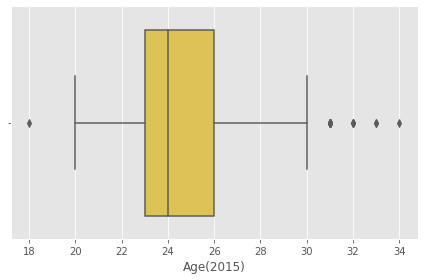

In [92]:
sns.boxplot(df['Age(2015)'], color = colors[5])
plt.xlabel('Age(2015)')
plt.tight_layout()
plt.show()

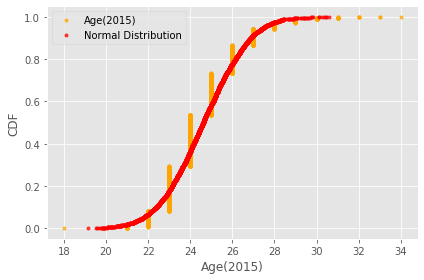

In [93]:
x_cp, y_cp = cdf(df['Age(2015)'])
x_sample_cp , y_sample_cp = \
cdf(np.random.normal(df['Age(2015)'].mean(), df['Age(2015)'].std(), size = \
                     len(df['Age(2015)'])))
plt.plot(x_cp, y_cp, linestyle = 'None', 
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Age(2015)')
plt.plot(x_sample_cp, y_sample_cp, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Age(2015)')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

* **Conclusions**:
NOTE : Age is calculated b/w DOB and 2015
1. Summary Plot : 75% of student's are less than 26 years old.
2. Histogram   : Majority of the student's age were in b/w 22 - 25. Mean, Median and mode for age happens to be approximately equal i.e 25. 
3. Box Plot    : There exist 4 students with very high age and one with very low relative to other data points.
4. CDF    : The data is not normally distributed.`,

## Categorical Features

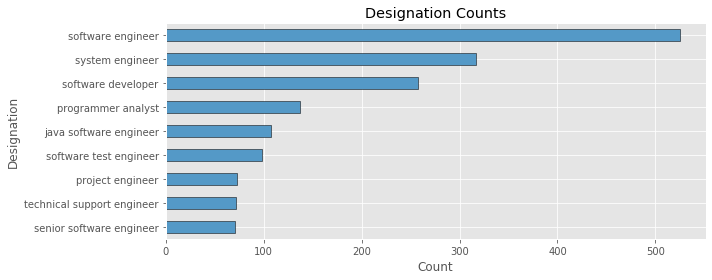

In [94]:
df['designation'].value_counts()[1:].sort_values(ascending = True).plot(kind = 'barh',
                                                                       color = colors[1],
                                                                       title = 'Designation Counts',
                                                                       figsize = (10,4),
                                                                       ec = 'k')
plt.ylabel('Designation')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

**CONCLUSION** :
Software engineer is the most common desgination of all, followed by system engineer and software developer.
**NOTE** : This graphs the most common designations. There exists *OTHER* category too.

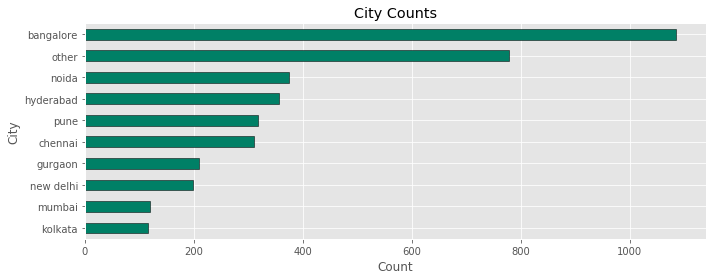

In [95]:
df['jobcity'].value_counts().sort_values(ascending = True).plot(kind = 'barh',
                                                                       cmap = 'summer',
                                                                       title = 'City Counts',
                                                                       figsize = (10,4),
                                                               ec = 'k')
plt.ylabel('City')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

**CONCLUSION** : The most favourable city for job placements is bangalore, followed by Noid, Hyderabad and pune. Mumbai and kolkata being least favourable.
    

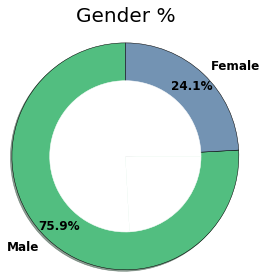

In [96]:
plt.pie(df['gender'].value_counts().tolist(), labels = df['gender'].value_counts().index,
       colors = [colors[4],colors[9]],
       autopct = '%1.1f%%',
       radius = 1.5,
       wedgeprops = {'edgecolor':'k'},
       textprops = {'fontsize':12,'fontweight':'bold'},
       shadow = True,
       #explode = [0.1,0],
       startangle = 90,
       pctdistance = 0.85)
plt.pie(df['gender'].value_counts().tolist(), colors = ['white'],
        wedgeprops = {'edgecolor':'white'},
       radius = 1)
plt.title('Gender %',pad = 40, size = 20)
plt.tight_layout()
plt.show()

**CONCLUSION** : 
The dataset is not balanced in terms of gender as the population of Male is really larger as compared to the female one.

In [97]:
df.head()

,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,12graduation,12percentage,12board,collegetier,degree,specialization,collegegpa,collegecitytier,collegestate,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age(2015),tenure,yeargap
0,420000,2012-06-01,2015-12-31,other,bangalore,Female,1990-02-19,84.3,other,2007,95.8,other,2,B.Tech/B.E.,computer science & engineering,78.00,0,andhra pradesh,2011.0,515,585,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,25,3.58,1.0
1,500000,2013-09-01,2015-12-31,other,other,Male,1989-10-04,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics & telecommunications,70.06,0,madhya pradesh,2012.0,695,610,780,0.960603,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,26,2.33,1.0
2,325000,2014-06-01,2015-12-31,system engineer,chennai,Female,1992-08-03,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,uttar pradesh,2014.0,615,545,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,23,1.58,0.0
3,1100000,2011-07-01,2015-12-31,senior software engineer,gurgaon,Male,1989-12-05,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer science & engineering,74.64,1,other,2011.0,635,585,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,26,4.50,0.0
4,200000,2014-03-01,2015-03-01,other,other,Male,1991-02-27,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics & telecommunications,73.90,0,uttar pradesh,2012.0,545,625,465,0.124502,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,24,1.00,2.0


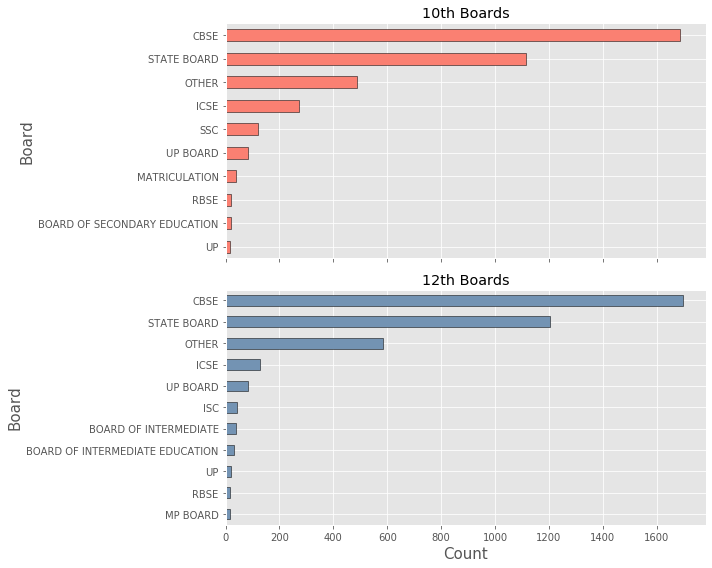

In [98]:
fig, ax = plt.subplots(2, 1, figsize = (10,8), sharex = True)
df['10board'].str.upper().value_counts().sort_values(ascending = True).plot(kind = 'barh', ax = ax[0],
                                                                           color = colors[6],
                                                                           ec = 'k',
                                                                           title = '10th Boards')
ax[0].set_ylabel('Board', size = 15)

df['12board'].str.upper().value_counts().sort_values(ascending = True).plot(kind = 'barh', ax = ax[1],
                                                                           color = colors[9],
                                                                           ec = 'k',
                                                                           title = '12th Boards')
ax[1].set_ylabel('Board', size = 15)
ax[1].set_xlabel('Count', size = 15)
plt.tight_layout()
plt.show()

**CONCLUSION** : 
    CBSE is the most common school board for both 12th and 10th.

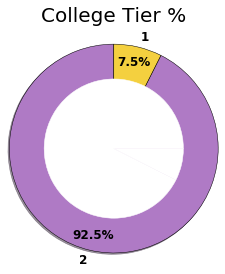

In [99]:
plt.pie(df['collegetier'].value_counts().tolist(), labels = df['collegetier'].value_counts().index,
       colors = [colors[2],colors[5]],
       autopct = '%1.1f%%',
       radius = 1.5,
       wedgeprops = {'edgecolor':'k'},
       textprops = {'fontsize':12,'fontweight':'bold'},
       shadow = True,
       #explode = [0.1,0],
       startangle = 90,
       pctdistance = 0.85)
plt.pie(df['collegetier'].value_counts().tolist(), colors = ['white'],
        wedgeprops = {'edgecolor':'white'},
       radius = 1)
plt.title('College Tier %',pad = 40, size = 20)
plt.margins(0.02)
plt.tight_layout()
plt.show()

**CONCLUSION** : Almost all the college belongs to Tier 1 only with a % of 92.5

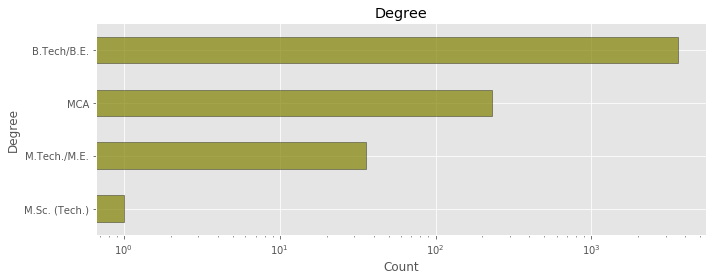

In [100]:
df['degree'].value_counts().sort_values(ascending = True).plot(kind = 'barh',
                                                                       color = colors[8],
                                                                       title = 'Degree',
                                                                       figsize = (10,4),
                                                                       ec = 'k',
                                                              alpha = 0.7)
plt.ylabel('Degree')
plt.xlabel('Count')
plt.xscale('log')
plt.tight_layout()
plt.show()

**CONCLUSION** :
    Most of the students have done their graduation in B.Tech and there are very less students from M.Sc(Tech)

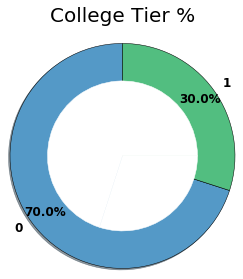

In [101]:
plt.pie(df['collegecitytier'].value_counts().tolist(), labels = df['collegecitytier'].value_counts().index,
       colors = [colors[1],colors[4]],
       autopct = '%1.1f%%',
       radius = 1.5,
       wedgeprops = {'edgecolor':'k'},
       textprops = {'fontsize':12,'fontweight':'bold'},
       shadow = True,
       startangle = 90,
       pctdistance = 0.85)
plt.pie(df['collegecitytier'].value_counts().tolist(), colors = ['white'],
        wedgeprops = {'edgecolor':'white'},
       radius = 1)
plt.title('College Tier %',pad = 40, size = 20)
plt.margins(0.02)
plt.tight_layout()
plt.show()

**CONCLUSION** : Majority of the colleges are form Tier 0 city.

In [102]:
df.head()

,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,12graduation,12percentage,12board,collegetier,degree,specialization,collegegpa,collegecitytier,collegestate,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age(2015),tenure,yeargap
0,420000,2012-06-01,2015-12-31,other,bangalore,Female,1990-02-19,84.3,other,2007,95.8,other,2,B.Tech/B.E.,computer science & engineering,78.00,0,andhra pradesh,2011.0,515,585,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,25,3.58,1.0
1,500000,2013-09-01,2015-12-31,other,other,Male,1989-10-04,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics & telecommunications,70.06,0,madhya pradesh,2012.0,695,610,780,0.960603,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,26,2.33,1.0
2,325000,2014-06-01,2015-12-31,system engineer,chennai,Female,1992-08-03,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,uttar pradesh,2014.0,615,545,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,23,1.58,0.0
3,1100000,2011-07-01,2015-12-31,senior software engineer,gurgaon,Male,1989-12-05,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer science & engineering,74.64,1,other,2011.0,635,585,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,26,4.50,0.0
4,200000,2014-03-01,2015-03-01,other,other,Male,1991-02-27,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics & telecommunications,73.90,0,uttar pradesh,2012.0,545,625,465,0.124502,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,24,1.00,2.0


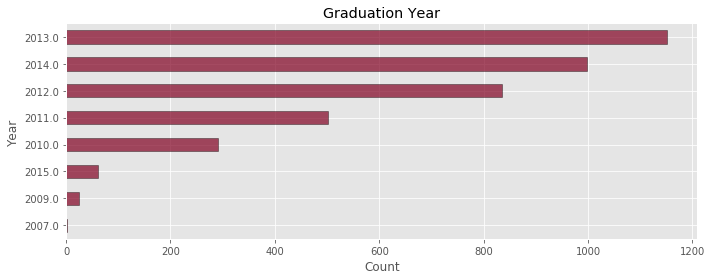

In [103]:
df['graduationyear'].value_counts().sort_values(ascending = True).plot(kind = 'barh',
                                                                       color = colors[7],
                                                                       title = 'Graduation Year',
                                                                       figsize = (10,4),
                                                                       ec = 'k',
                                                              alpha = 0.7)
plt.ylabel('Year')
plt.xlabel('Count')
#plt.xscale('log')
plt.tight_layout()
plt.show()

**CONCLUSION** : Maximum number of students were graduated in 2013, followed by the year 2014 and 2012.

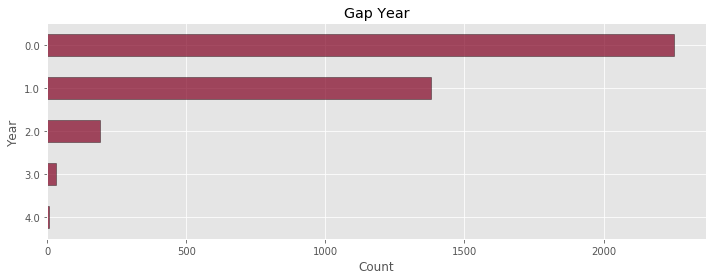

In [104]:
df['yeargap'].value_counts().sort_values(ascending = True).plot(kind = 'barh',
                                                                       color = colors[7],
                                                                       title = 'Gap Year',
                                                                       figsize = (10,4),
                                                                       ec = 'k',
                                                              alpha = 0.7)
plt.ylabel('Year')
plt.xlabel('Count')
#plt.xscale('log')
plt.tight_layout()
plt.show()

**CONCLUSION** : Maximum number of students have 0 gap years i.e the students got placed in the same year they got graduated. Some students do have 1 year gap.

# Outlier removal <a id="6"></a>

In [105]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [106]:
columns = ['salary','10percentage','12percentage','english',
          'logical','quant','domain', 'computerprogramming',
       'electronicsandsemicon', 'computerscience', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Age(2015)', 'tenure', 'yeargap']
df_copy = df.copy()

In [107]:
for cols in columns:
    #exctracting upper fence and lower fence
    lowerbound,upperbound = outlier_treatment(df_copy[cols])

    #dropping the outlier
    df_copy = df_copy.drop(df_copy[(df_copy[cols] < lowerbound) | (df_copy[cols] > upperbound)].index)

In [108]:
print(f'Number of observations with outliers : {df.shape[0]}')
print(f'Number of observations without outliers : {df_copy.shape[0]}')

Number of observations with outliers : 3864
Number of observations without outliers : 2463


# Bivariate Analysis <a id="7"></a>

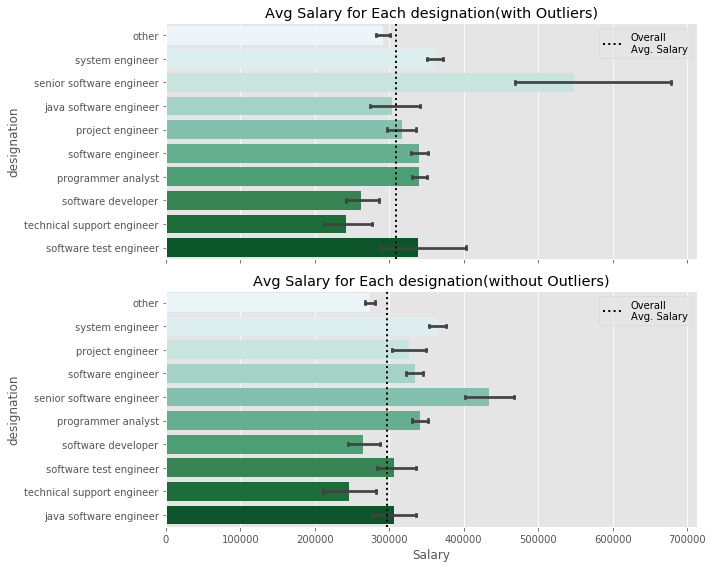

In [109]:
fig, ax = plt.subplots(2, 1, figsize = (10,8), sharex = True)
sns.barplot(x = 'salary', y = 'designation',
           data = df,
           palette = 'BuGn',
           capsize = 0.1,
           ax = ax[0])
ax[0].axvline(df['salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')
ax[0].set_title('Avg Salary for Each designation(with Outliers)')
ax[0].legend()
ax[0].set_xlabel('')


sns.barplot(x = 'salary', y = 'designation',
           data = df_copy,
           palette = 'BuGn',
           capsize = 0.1,
           ax = ax[1])
ax[1].axvline(df_copy['salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')
ax[1].set_title('Avg Salary for Each designation(without Outliers)')
ax[1].legend()
ax[1].set_xlabel('Salary')



plt.tight_layout()
plt.show()

**CONCLUSION** : 
Bar plot shows the maximum salary for each designation. Senior Software Engineer has the highest salary but they also has the maximum standard deviation in their salary. There are only two designations namely, software developer and technical support engineer who has salary lower than average salary.

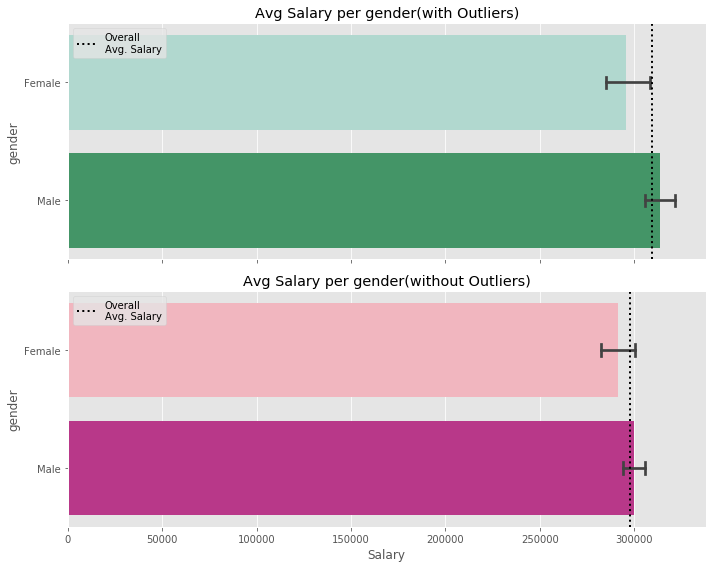

In [110]:
fig, ax = plt.subplots(2, 1, figsize = (10,8), sharex = True)
sns.barplot(x = 'salary', y = 'gender',
           data = df,
           palette = 'BuGn',
           capsize = 0.1,
           ax = ax[0])
ax[0].axvline(df['salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')
ax[0].set_title('Avg Salary per gender(with Outliers)')
ax[0].legend()
ax[0].set_xlabel('')


sns.barplot(x = 'salary', y = 'gender',
           data = df_copy,
           palette = 'RdPu',
           capsize = 0.1,
           ax = ax[1])
ax[1].axvline(df_copy['salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')
ax[1].set_title('Avg Salary per gender(without Outliers)')
ax[1].legend()
ax[1].set_xlabel('Salary')



plt.tight_layout()
plt.show()

**CONCLUSION**: The average salary for both male and female is approximately equal and it implies that there was no gender bias in terms of salary. It is also plausible to say that Female's get salary below the overall average salary.

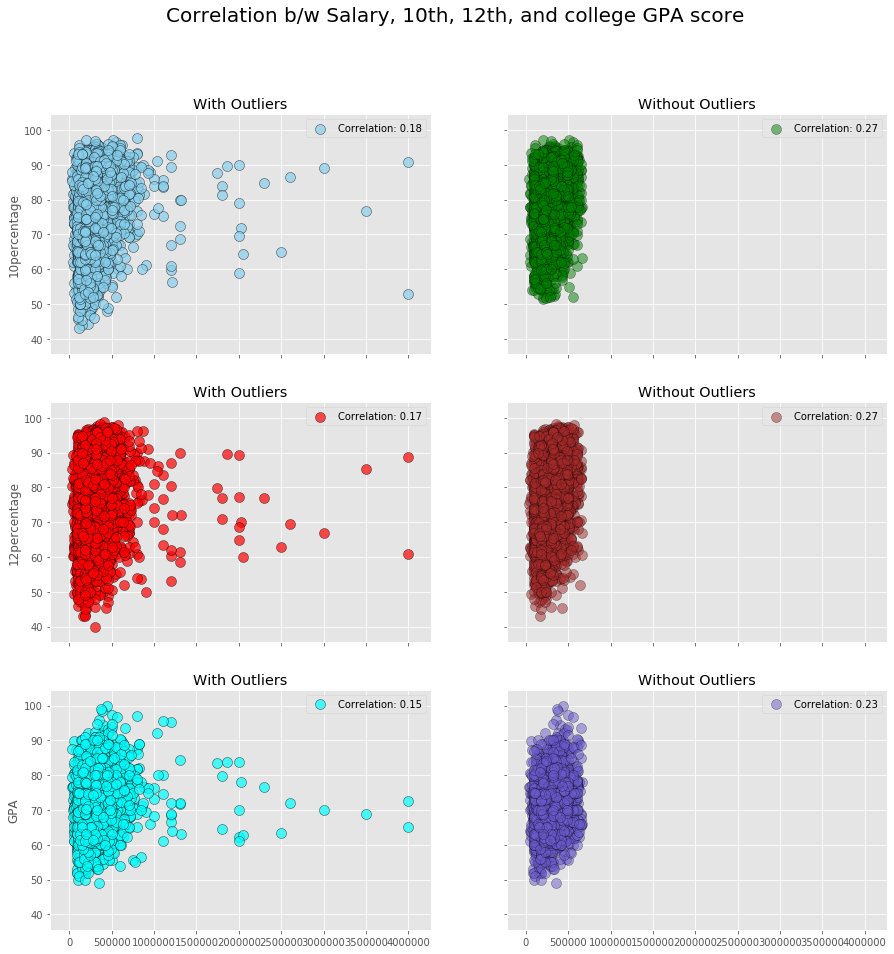

In [111]:
fig, ax = plt.subplots(3, 2, figsize = (15,15), sharex = True, sharey = True)

#scatter plot for salary and 10th score
ax[0,0].scatter(df['salary'],df['10percentage'],
               ec = 'k',
               color = 'skyblue',
               alpha = 0.7,
               s = 100,
               label = f"Correlation: {round(df[['salary','10percentage']].corr().iloc[1,0],2)}"
               )
ax[0,0].set_ylabel('10percentage')
ax[0,0].set_title('With Outliers')
ax[0,0].legend()


ax[0,1].scatter(df_copy['salary'],df_copy['10percentage'],
               ec = 'k',
               color = 'green',
               alpha = 0.5,
               s = 100,
               label = f"Correlation: {round(df_copy[['salary','10percentage']].corr().iloc[1,0],2)}"
               )
ax[0,1].set_title('Without Outliers')
ax[0,1].legend()


#scatter plot for salary and 12th score.
ax[1,0].scatter(df['salary'],df['12percentage'],
               ec = 'k',
               color = 'red',
               alpha = 0.7,
               s = 100,
               label = f"Correlation: {round(df[['salary','12percentage']].corr().iloc[1,0],2)}"
               )
ax[1,0].set_ylabel('12percentage')
ax[1,0].set_title('With Outliers')
ax[1,0].legend()


ax[1,1].scatter(df_copy['salary'],df_copy['12percentage'],
               ec = 'k',
               color = 'brown',
               alpha = 0.5,
               s = 100,
               label = f"Correlation: {round(df_copy[['salary','12percentage']].corr().iloc[1,0],2)}"
               )
ax[1,1].set_title('Without Outliers')
ax[1,1].legend()


#scatter plot for salary and college gpa score.
ax[2,0].scatter(df['salary'],df['collegegpa'],
               ec = 'k',
               color = 'cyan',
               alpha = 0.7,
               s = 100,
               label = f"Correlation: {round(df[['salary','collegegpa']].corr().iloc[1,0],2)}"
               )
ax[2,0].set_ylabel('GPA')
ax[2,0].set_title('With Outliers')
ax[2,0].legend()


ax[2,1].scatter(df_copy['salary'],df_copy['collegegpa'],
               ec = 'k',
               color = 'slateblue',
               alpha = 0.5,
               s = 100,
               label = f"Correlation: {round(df_copy[['salary','collegegpa']].corr().iloc[1,0],2)}"
               )
ax[2,1].set_title('Without Outliers')
ax[2,1].legend()



fig.suptitle('Correlation b/w Salary, 10th, 12th, and college GPA score', size = 20)
plt.show()

**CONCLUSION** : There does not exist any correaltion b/w Salary, 10th, 12th and GPA scores.

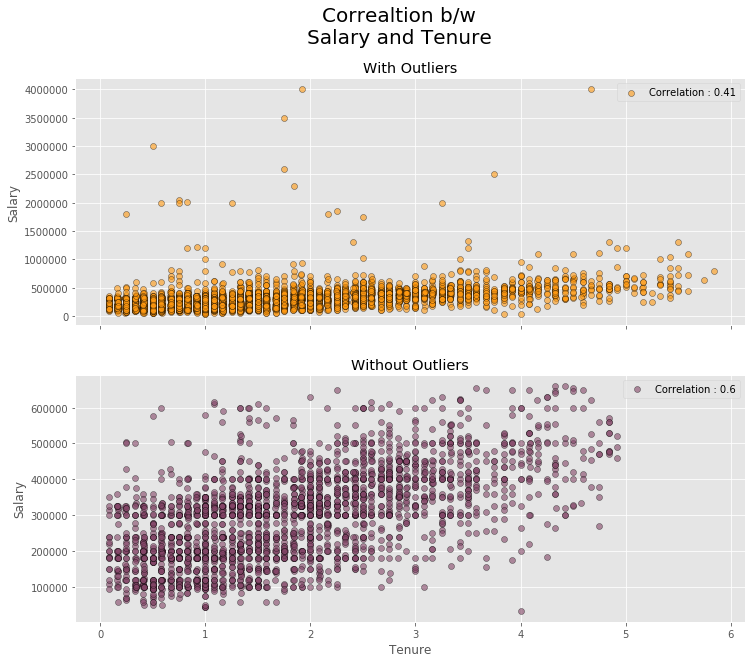

In [112]:
#correaltion b/w salary, age and tenure.
fig, ax = plt.subplots(2, 1, figsize = (12,10), sharex  = True)
ax[0].scatter(df['tenure'], df['salary'],
             ec = 'k',
             color = '#ff9911',
             alpha = 0.6,
             label = f"Correlation : {round(df[['tenure','salary']].corr().iloc[1,0],2)}"
             )
ax[0].legend()
ax[0].set_ylabel('Salary')
ax[0].set_title('With Outliers')


ax[1].scatter(df_copy['tenure'], df_copy['salary'],
             ec = 'k',
             color = '#834567',
             alpha = 0.6,
             label = f"Correlation : {round(df_copy[['tenure','salary']].corr().iloc[1,0],2)}"
             )
ax[1].legend()
ax[1].set_ylabel('Salary')
ax[1].set_title('Without Outliers')
ax[1].set_xlabel('Tenure')

fig.suptitle('Correaltion b/w\nSalary and Tenure', size = 20)

plt.show()

**CONCLUSION** : After removing the outliers, it is evident that salary gets about 50% of increment as tenure increase as there is a positive correlation of 0.60.

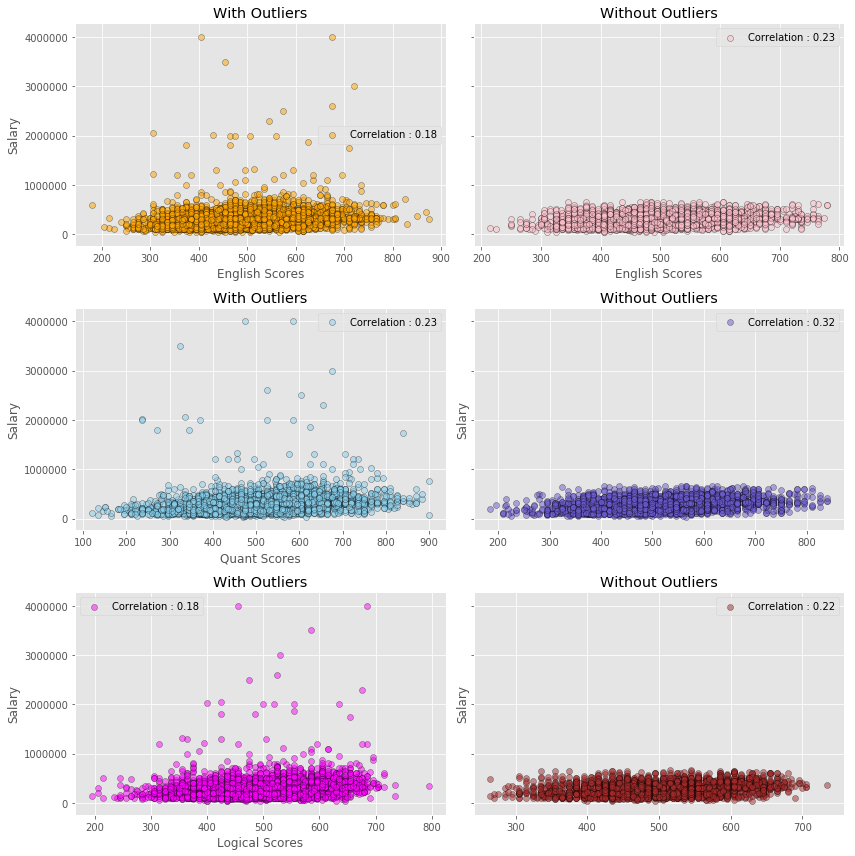

In [113]:
fig, ax = plt.subplots(3, 2, figsize = (12,12), sharey = True)
ax[0,0].scatter(df['english'],df['salary'],
               ec = 'k',
               color = 'orange',
               alpha = 0.5,
               label = f"Correlation : {round(df[['english','salary']].corr().iloc[1,0],2)}"
               )
ax[0,0].set_ylabel('Salary')
ax[0,0].set_xlabel('English Scores')
ax[0,0].set_title('With Outliers')
ax[0,0].legend()


ax[0,1].scatter(df_copy['english'],df_copy['salary'],
               ec = 'k',
               color = 'pink',
               alpha = 0.5,
               label = f"Correlation : {round(df_copy[['english','salary']].corr().iloc[1,0],2)}"
               )
ax[0,1].set_title('Without Outliers')
ax[0,1].set_xlabel('English Scores')
ax[0,1].legend()




ax[1,0].scatter(df['quant'],df['salary'],
               ec = 'k',
               color = 'skyblue',
               alpha = 0.5,
               label = f"Correlation : {round(df[['quant','salary']].corr().iloc[1,0],2)}"
               )
ax[1,0].set_ylabel('Salary')
ax[1,0].set_xlabel('Quant Scores')
ax[1,0].set_title('With Outliers')
ax[1,0].legend()


ax[1,1].scatter(df_copy['quant'],df_copy['salary'],
               ec = 'k',
               color = 'slateblue',
               alpha = 0.5,
               label = f"Correlation : {round(df_copy[['quant','salary']].corr().iloc[1,0],2)}"
               )
ax[1,1].set_ylabel('Salary')
ax[1,1].set_title('Without Outliers')
ax[1,1].legend()



ax[2,0].scatter(df['logical'],df['salary'],
               ec = 'k',
               color = 'magenta',
               alpha = 0.5,
               label = f"Correlation : {round(df[['logical','salary']].corr().iloc[1,0],2)}"
               )
ax[2,0].set_ylabel('Salary')
ax[2,0].set_xlabel('Logical Scores')
ax[2,0].set_title('With Outliers')
ax[2,0].legend()


ax[2,1].scatter(df_copy['logical'],df_copy['salary'],
               ec = 'k',
               color = 'brown',
               alpha = 0.5,
               label = f"Correlation : {round(df_copy[['logical','salary']].corr().iloc[1,0],2)}"
               )
ax[2,1].set_ylabel('Salary')
ax[2,1].set_title('Without Outliers')
ax[2,1].legend()


plt.tight_layout()
plt.show()

**CONCLUSION** : The scatters plots gives adequate evidence that salary is not effected by any of the above scores.

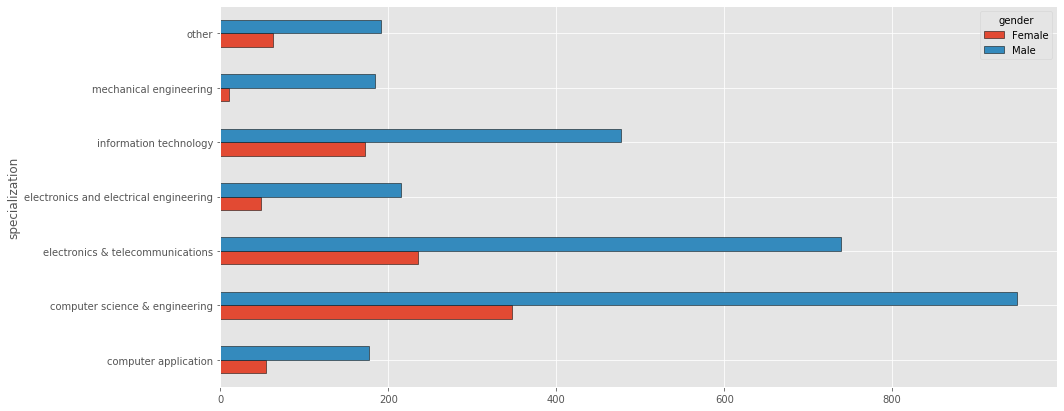

In [114]:
pd.crosstab(df['gender'],df['specialization']).T.plot(kind = 'barh',
                                                     ec = 'k',
                                                     figsize = (15,7))

**CONCLUSION** : There are almost males 2 times as of females in every specialization. Also, there are very less number of females who opted for mechanical and electronics.

In [115]:
df_copy.head()

,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,12graduation,12percentage,12board,collegetier,degree,specialization,collegegpa,collegecitytier,collegestate,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age(2015),tenure,yeargap
0,420000,2012-06-01,2015-12-31,other,bangalore,Female,1990-02-19,84.3,other,2007,95.8,other,2,B.Tech/B.E.,computer science & engineering,78.00,0,andhra pradesh,2011.0,515,585,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,25,3.58,1.0
1,500000,2013-09-01,2015-12-31,other,other,Male,1989-10-04,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics & telecommunications,70.06,0,madhya pradesh,2012.0,695,610,780,0.960603,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,26,2.33,1.0
2,325000,2014-06-01,2015-12-31,system engineer,chennai,Female,1992-08-03,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,uttar pradesh,2014.0,615,545,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,23,1.58,0.0
4,200000,2014-03-01,2015-03-01,other,other,Male,1991-02-27,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics & telecommunications,73.90,0,uttar pradesh,2012.0,545,625,465,0.124502,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,24,1.00,2.0
9,230000,2014-07-01,2015-12-31,project engineer,kolkata,Male,1993-06-13,77.0,cbse,2010,72.2,cbse,2,B.Tech/B.E.,electronics & telecommunications,78.00,1,west bengal,2014.0,605,565,545,0.493596,385.0,324,0,-1.3080,0.5454,-0.9122,0.90660,0.0973,22,1.50,0.0


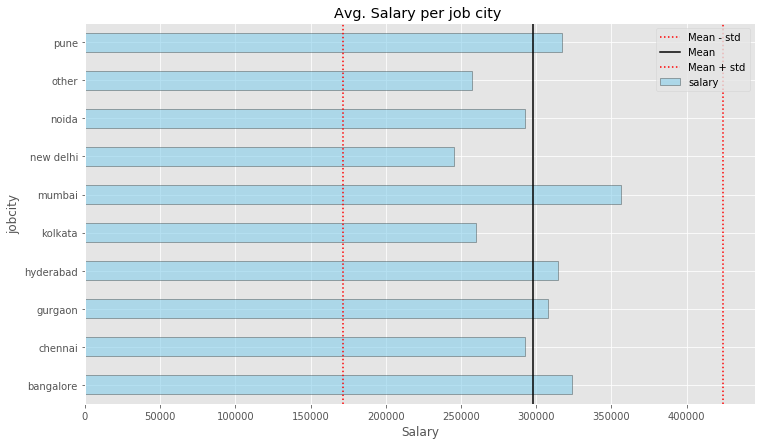

In [116]:
pd.pivot_table(index = 'jobcity',
              values = 'salary',
              data = df_copy).plot(kind = 'barh',
                             ec = 'k',
                            alpha = 0.6,
                                  color = 'skyblue',
                                  title = 'Avg. Salary per job city ',
                                  figsize = (12,7))
plt.xlabel('Salary')
plt.axvline(df_copy['salary'].mean() - df_copy['salary'].std(), 
            color = 'red',
           linestyle = ':',
           label = 'Mean - std')
plt.axvline(df_copy['salary'].mean(), color = 'k', label = 'Mean')
plt.axvline(df_copy['salary'].mean() + df_copy['salary'].std(), color = 'red',
           linestyle = ':',
           label = 'Mean + std')
plt.legend()
plt.show()

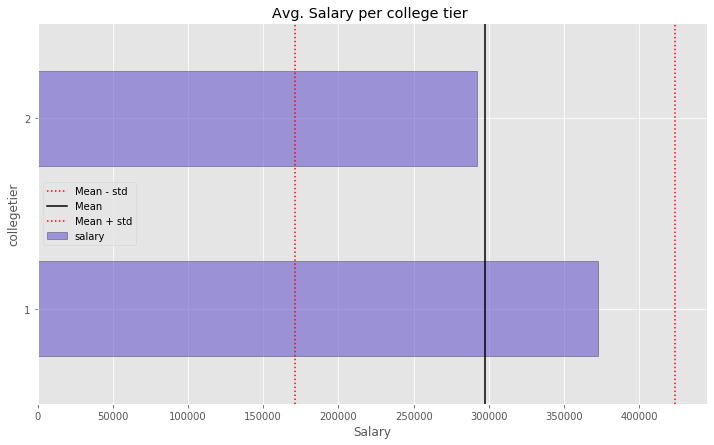

In [117]:
pd.pivot_table(index = 'collegetier',
              values = 'salary',
              data = df_copy).plot(kind = 'barh',
                            alpha = 0.6,
                                  color = 'slateblue',
                                  title = 'Avg. Salary per college tier ',
                                  figsize = (12,7),
                                  ec = 'k')
plt.xlabel('Salary')
plt.axvline(df_copy['salary'].mean() - df_copy['salary'].std(), 
            color = 'red',
           linestyle = ':',
           label = 'Mean - std')
plt.axvline(df_copy['salary'].mean(), color = 'k', label = 'Mean')
plt.axvline(df_copy['salary'].mean() + df_copy['salary'].std(), color = 'red',
           linestyle = ':',
           label = 'Mean + std')
plt.legend()
plt.show()

**CONCLUSION** : College within tier one offers high salary as compared to the colleges in tier 2. Colleges in tier 2 offers below overall average salary.

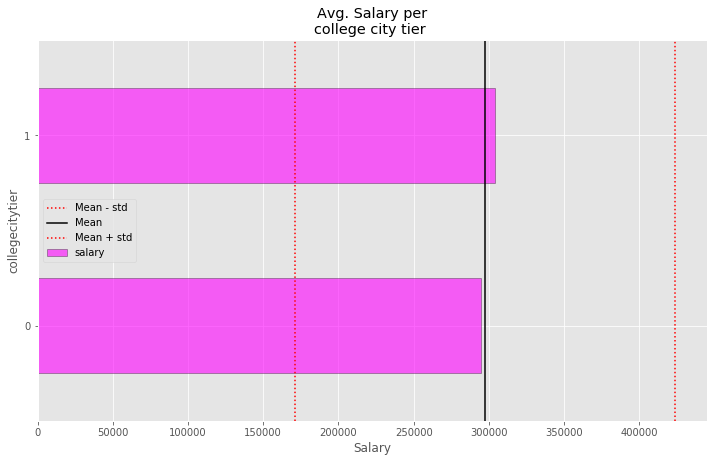

In [118]:
pd.pivot_table(index = 'collegecitytier',
              values = 'salary',
              data = df_copy).plot(kind = 'barh',
                            alpha = 0.6,
                                  color = 'magenta',
                                  title = 'Avg. Salary per\ncollege city tier ',
                                  figsize = (12,7),
                                  ec = 'k')
plt.xlabel('Salary')
plt.axvline(df_copy['salary'].mean() - df_copy['salary'].std(), 
            color = 'red',
           linestyle = ':',
           label = 'Mean - std')
plt.axvline(df_copy['salary'].mean(), color = 'k', label = 'Mean')
plt.axvline(df_copy['salary'].mean() + df_copy['salary'].std(), color = 'red',
           linestyle = ':',
           label = 'Mean + std')
plt.legend()
plt.show()

**CONCLUSION** : Cities under tier 1 and 2 offers almost same salaries to students.

# Tri Variate Scatter Plots <a id="8"></a>

In [119]:
df_copy.head()

,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,12graduation,12percentage,12board,collegetier,degree,specialization,collegegpa,collegecitytier,collegestate,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age(2015),tenure,yeargap
0,420000,2012-06-01,2015-12-31,other,bangalore,Female,1990-02-19,84.3,other,2007,95.8,other,2,B.Tech/B.E.,computer science & engineering,78.00,0,andhra pradesh,2011.0,515,585,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,25,3.58,1.0
1,500000,2013-09-01,2015-12-31,other,other,Male,1989-10-04,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics & telecommunications,70.06,0,madhya pradesh,2012.0,695,610,780,0.960603,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,26,2.33,1.0
2,325000,2014-06-01,2015-12-31,system engineer,chennai,Female,1992-08-03,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,uttar pradesh,2014.0,615,545,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,23,1.58,0.0
4,200000,2014-03-01,2015-03-01,other,other,Male,1991-02-27,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics & telecommunications,73.90,0,uttar pradesh,2012.0,545,625,465,0.124502,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,24,1.00,2.0
9,230000,2014-07-01,2015-12-31,project engineer,kolkata,Male,1993-06-13,77.0,cbse,2010,72.2,cbse,2,B.Tech/B.E.,electronics & telecommunications,78.00,1,west bengal,2014.0,605,565,545,0.493596,385.0,324,0,-1.3080,0.5454,-0.9122,0.90660,0.0973,22,1.50,0.0


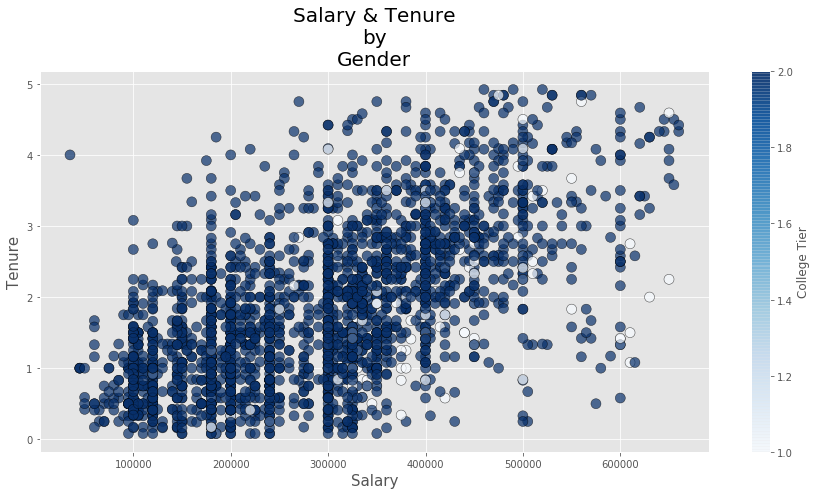

In [120]:
plt.figure(figsize = (15, 7))
plt.scatter(df_copy['salary'], df_copy['tenure'],
               ec = 'k',
               s = 100,
           c = df_copy['collegetier'],
           cmap = 'Blues',
           alpha = 0.7)
plt.colorbar(norm = True).set_label('College Tier')
plt.title('Salary & Tenure\nby\nGender', size = 20)
plt.xlabel('Salary', size = 15)
plt.ylabel('Tenure', size = 15)
plt.show()

**CONCLUSION** : Most of colleges are from tier 2

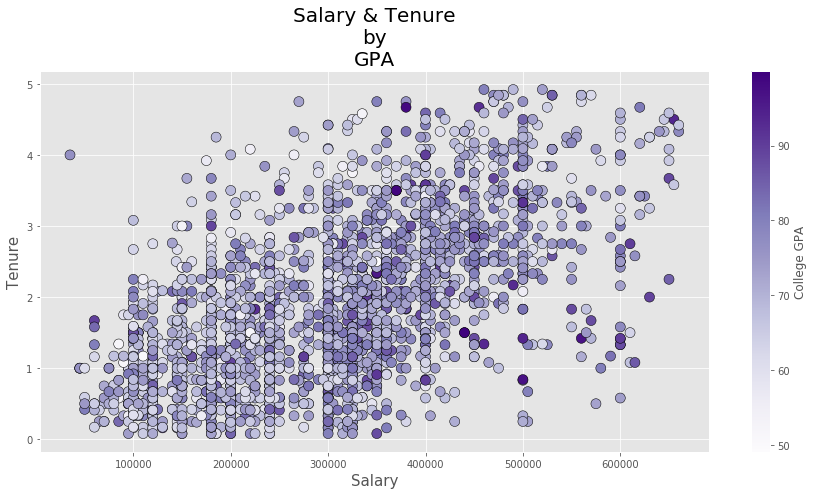

In [121]:
plt.figure(figsize = (15, 7))
plt.scatter(df_copy['salary'], df_copy['tenure'],
               ec = 'k',
           s = 100,
           c = df_copy['collegegpa'],
           cmap = 'Purples')
plt.title('Salary & Tenure\nby\nGPA', size = 20)
plt.xlabel('Salary', size = 15)
plt.ylabel('Tenure', size = 15)
plt.colorbar().set_label('College GPA')
plt.show()

**CONCLUSION** : There are very less students with high salary, tenure and GPA